In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import warnings
from scipy import stats
from scipy.stats import fisher_exact
from scipy.stats import f_oneway
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import matthews_corrcoef
from scipy.stats import chi2_contingency

In [2]:
#Importation de notre Dataframe
df= pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
#Affichage de notre Dataframe
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Supprimer la catégorie "Other" du DataFrame
df = df[df['gender'] != 'Other']
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [5]:
#Affichage des variables categorielles
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


In [6]:
#Noms de colonnes avec le nombre de valeurs quantitatives ou qualitatives(si sup à 3 c'est Quantitativ sinon Qualitativ)
liste_colonnes=df.columns
print(liste_colonnes)
df.nunique()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


id                   5109
gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3978
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [7]:
# Nomination des variables qualitatives et quantitatives
variables_quantitatives= ['age', 'avg_glucose_level', 'bmi']
variables_qualitatives= ['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status', 'stroke']
print("Variables quantitatives : ", variables_quantitatives)
print("Variables qualitatives : ", variables_qualitatives)

Variables quantitatives :  ['age', 'avg_glucose_level', 'bmi']
Variables qualitatives :  ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']


In [8]:
# Affichage des statistiques descriptives sans spécifier le type de colonnes
total_df = df.describe()
total_df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [9]:
# Afficher le nombre de valeurs manquantes par colonne
missing_values = df.isna().sum()
print(missing_values)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


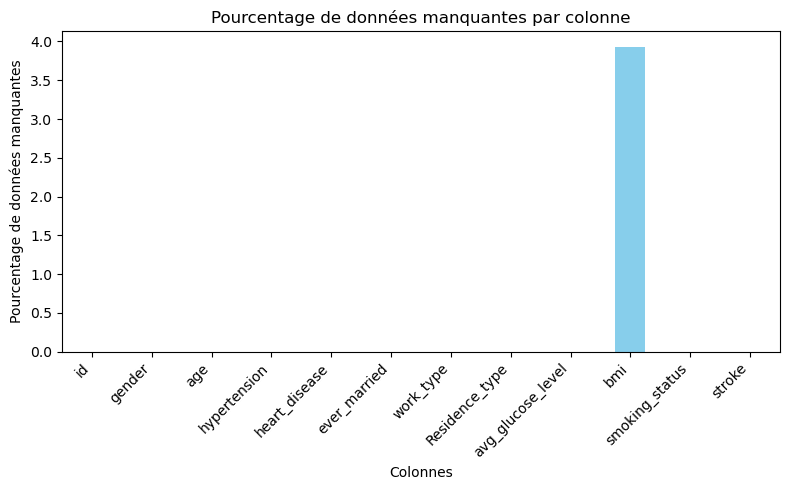

In [10]:
# Calculer le pourcentage de données manquantes par colonne
pourcentage_manquant_par_colonne = (df.isnull().sum() / len(df)) * 100

# Créer le graphique à barres
plt.figure(figsize=(8, 5))
pourcentage_manquant_par_colonne.plot(kind='bar', color='skyblue')
plt.title('Pourcentage de données manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Pourcentage de données manquantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* **id** : identifiant unique.  
* **gender** : genre du patient.  
* **age** : âge du patient.  
* **hypertension** : 0 si le patient n'a pas d'hypertension, 1 si le patient a de l'hypertension.  
* **heart_disease** : 0 si le patient n'a pas de maladie cardiaque, 1 si le patient a une maladie cardiaque.  
* **ever_married** : si le patient a déjà été marié ou pas.  
* **work_type** : type de travail du patient.  
* **Residence_type** : type de résidence du patient *"Rural"* ou *"Urbain"*.  
* **avg_glucose_level** : taux moyen de glucose dans le sang.  
* **bmi** : indice de masse corporelle.  
* **smoking_status** : *"a déjà fumé"*, *"n'a jamais fumé"*, *"fumé"* ou *"Inconnu"*.  
* **stroke** : 1 si le patient a eu un accident vasculaire cérébral ou 0 s'il n'en a pas eu.  

# Analyse univariée pour les variables quantitatives :

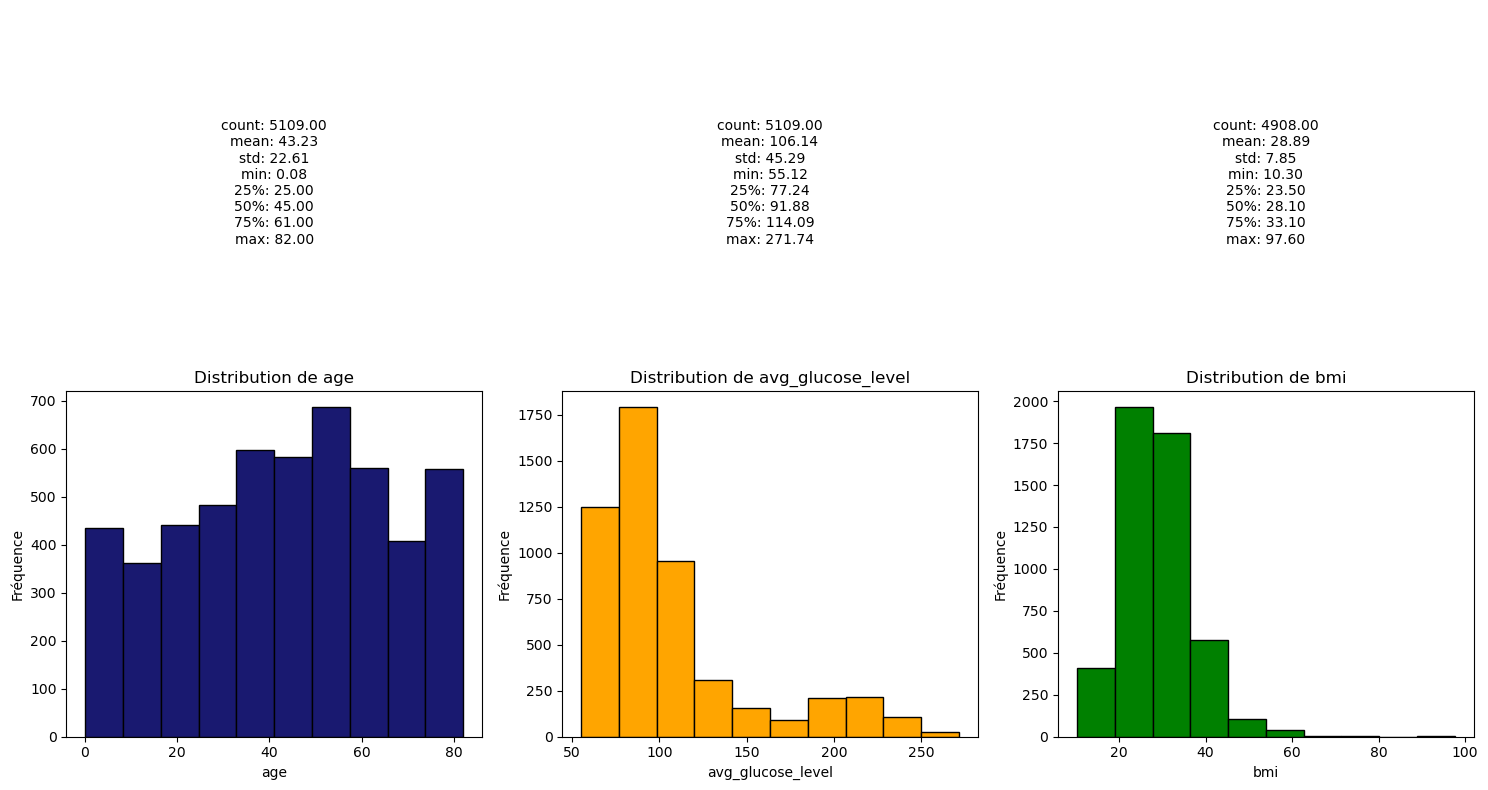

In [11]:
# Liste des variables quantitatives (Graph à barres)
variables_quantitatives = ['age', 'avg_glucose_level', 'bmi']
colors = ['midnightblue', 'orange', 'green']

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(2, len(variables_quantitatives), figsize=(15, 8))

# Boucle pour générer les graphiques pour chaque variable + histogrammes
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors)):

    axes[1, i].hist(df[variable], bins=10, color=color, edgecolor='black')
    axes[1, i].set_title(f'Distribution de {variable}')
    axes[1, i].set_xlabel(variable)
    axes[1, i].set_ylabel('Fréquence')

# Statistiques descriptives
    stats = df[variable].describe()
    stats_text = "\n".join([f"{stat}: {value:.2f}" for stat, value in stats.items()])

# Ajout des statistiques descriptives au-dessus du leur graphique
    axes[0, i].text(0.5, 0.5, stats_text, fontsize=10, ha='center', va='center', transform=axes[0, i].transAxes)
    axes[0, i].axis('off')
    
plt.tight_layout()
plt.show()

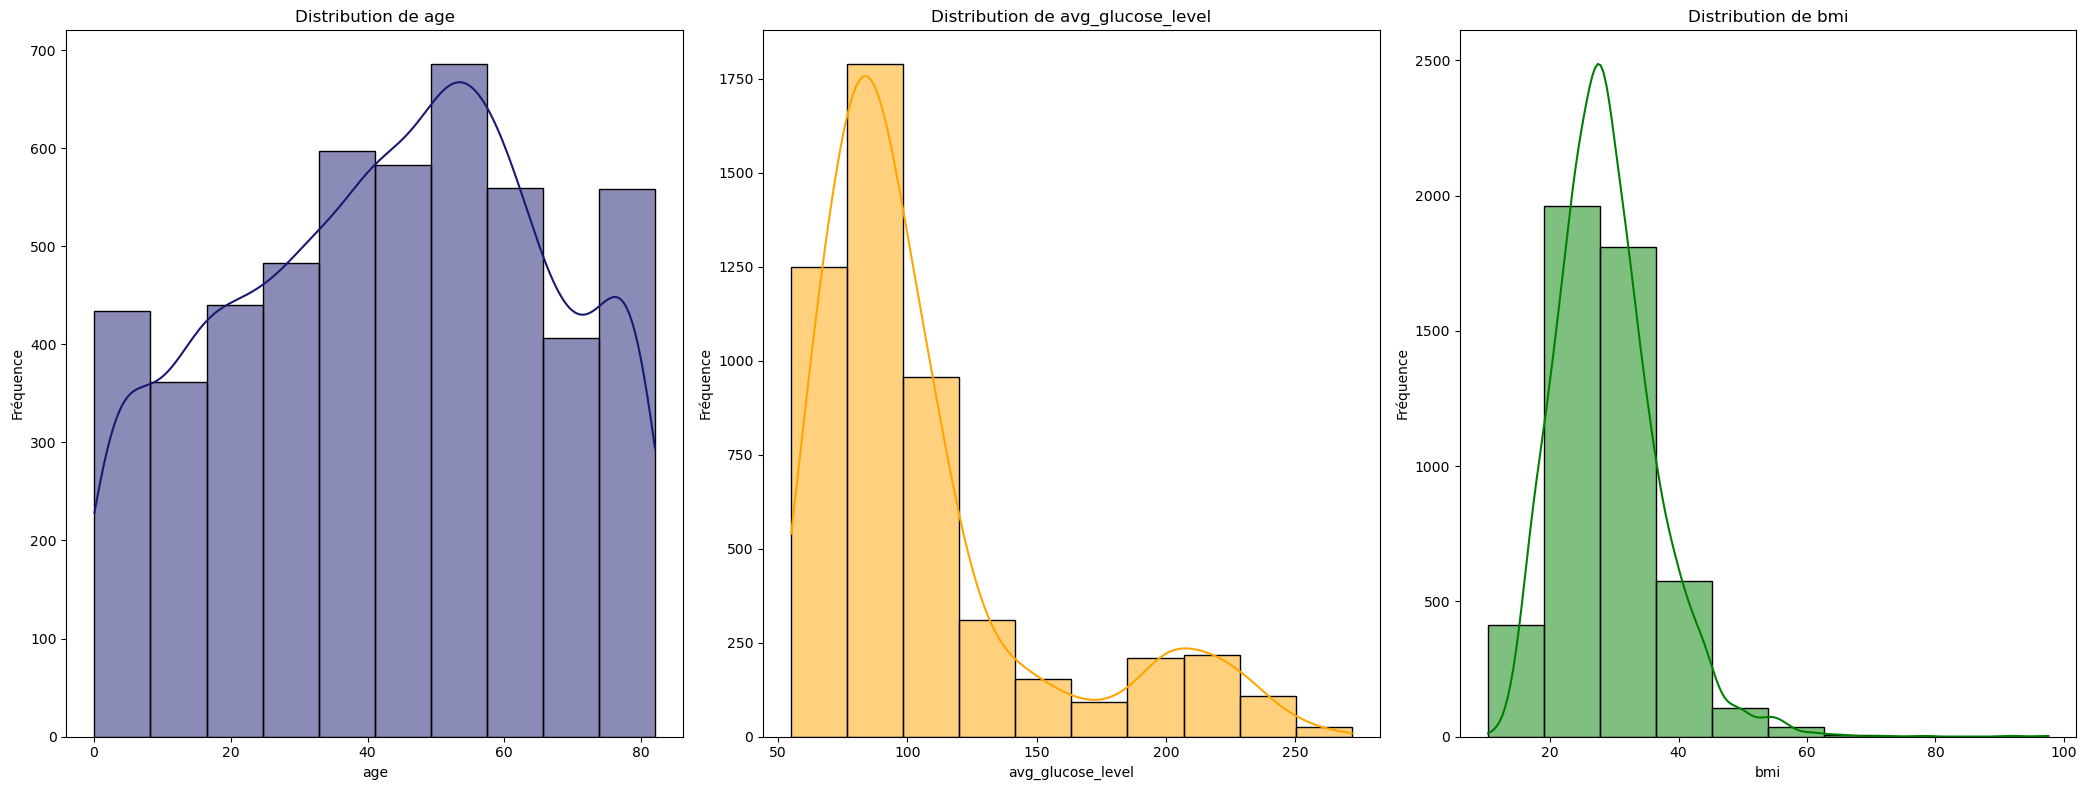

In [12]:
# Ignorer les avertissements de FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Liste des variables quantitatives
variables_quantitatives = ['age', 'avg_glucose_level', 'bmi']
colors = ['midnightblue', 'orange', 'green']

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(1, len(variables_quantitatives), figsize=(21, 8))

# Boucle pour générer les graphiques pour chaque variable + histogrammes - KDE
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors)):
    # Distribution avec Seaborn
    sns.histplot(df[variable], bins=10, color=color, ax=axes[i], edgecolor='black', kde = True)
    axes[i].set_title(f'Distribution de {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Fréquence')

    # Statistiques descriptives
    stats = df[variable].describe()
    stats_text = "\n".join([f"{stat}: {value:.2f}" for stat, value in stats.items()])
    
plt.tight_layout()
plt.show()

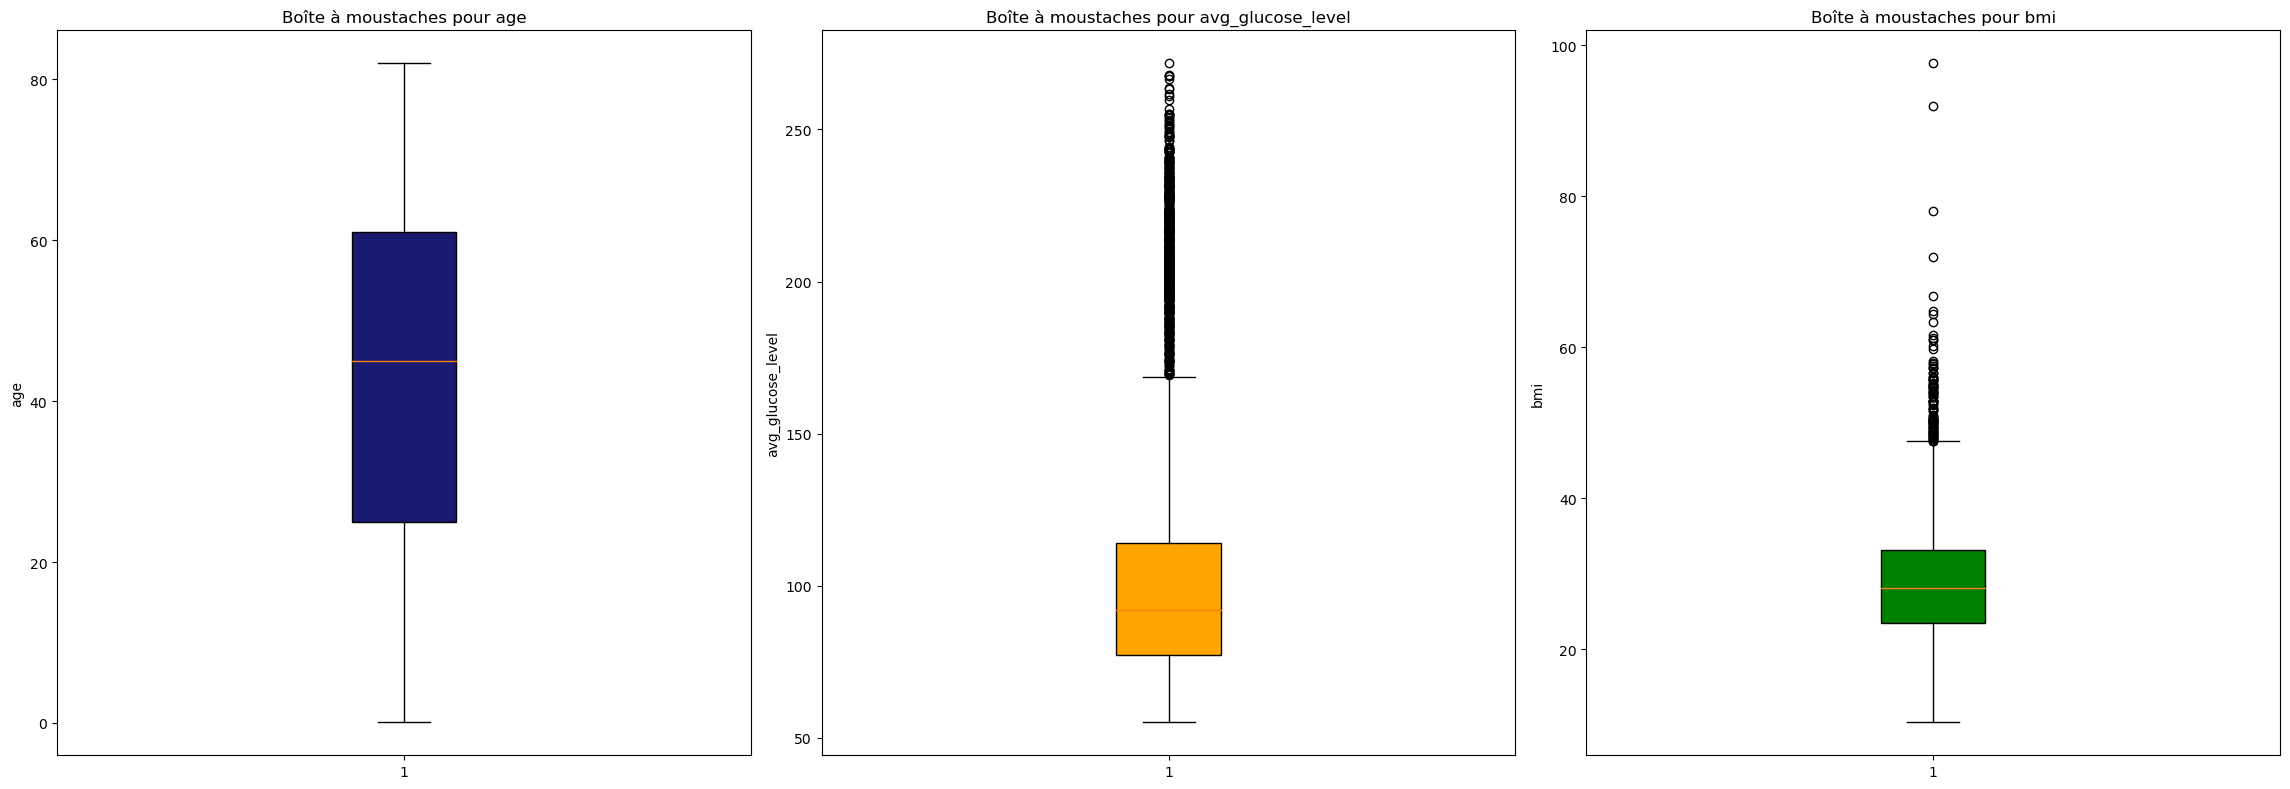

In [13]:
# Liste des variables quantitatives (Graph à moustaches)
variables_quantitatives = ['age', 'avg_glucose_level', 'bmi']
colors = ['midnightblue', 'orange', 'green']

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(1, len(variables_quantitatives), figsize=(23, 8))

# Boucle pour générer les graphiques pour chaque variable + boîtes à moustaches
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors)):
    # Boîte à moustaches
    if variable == 'bmi':
        indice_masse_corporelle = df[variable].dropna()
        axes[i].boxplot(indice_masse_corporelle, showfliers=True, patch_artist=True, boxprops=dict(facecolor=color))
    else:
        axes[i].boxplot(df[variable], patch_artist=True, boxprops=dict(facecolor=color))
    axes[i].set_title(f'Boîte à moustaches pour {variable}')
    axes[i].set_ylabel(variable)

# Statistiques descriptives
    stats = df[variable].describe()
    stats_text = "\n".join([f"{stat}: {value:.2f}" for stat, value in stats.items()])

plt.tight_layout()
plt.show()

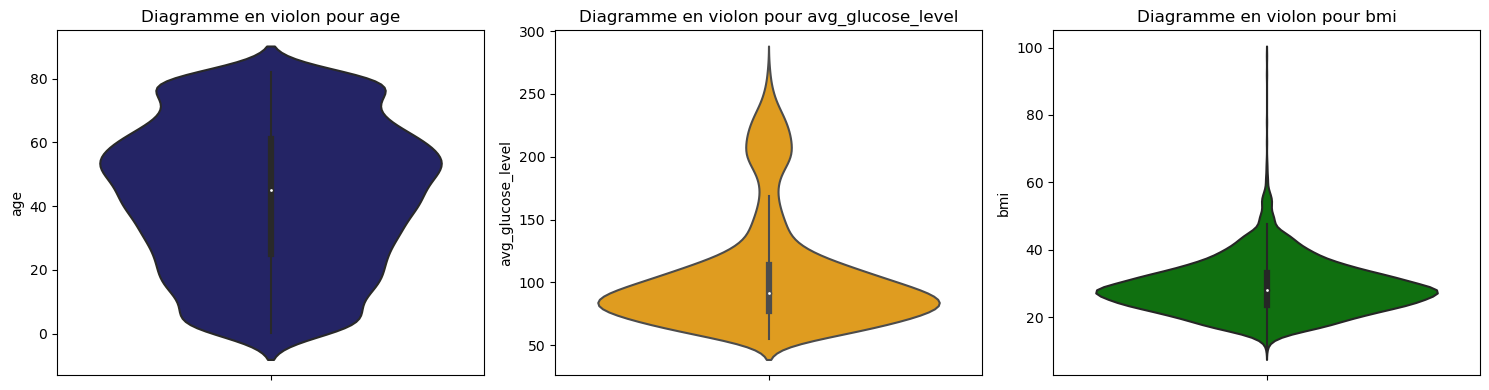

In [14]:
# Liste des variables quantitatives
variables_quantitatives = ['age', 'avg_glucose_level', 'bmi']
colors = ['midnightblue', 'orange', 'green']

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(1, len(variables_quantitatives), figsize=(15, 4))

# Boucle pour générer les diagrammes en violon pour chaque variable
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors)):
    # Diagramme en violon
    sns.violinplot(data=df, y=variable, ax=axes[i], color=color)
    axes[i].set_title(f'Diagramme en violon pour {variable}')
    axes[i].set_ylabel(variable)

plt.tight_layout()
plt.show()

# Analyse univariée pour les variables qualitatives 

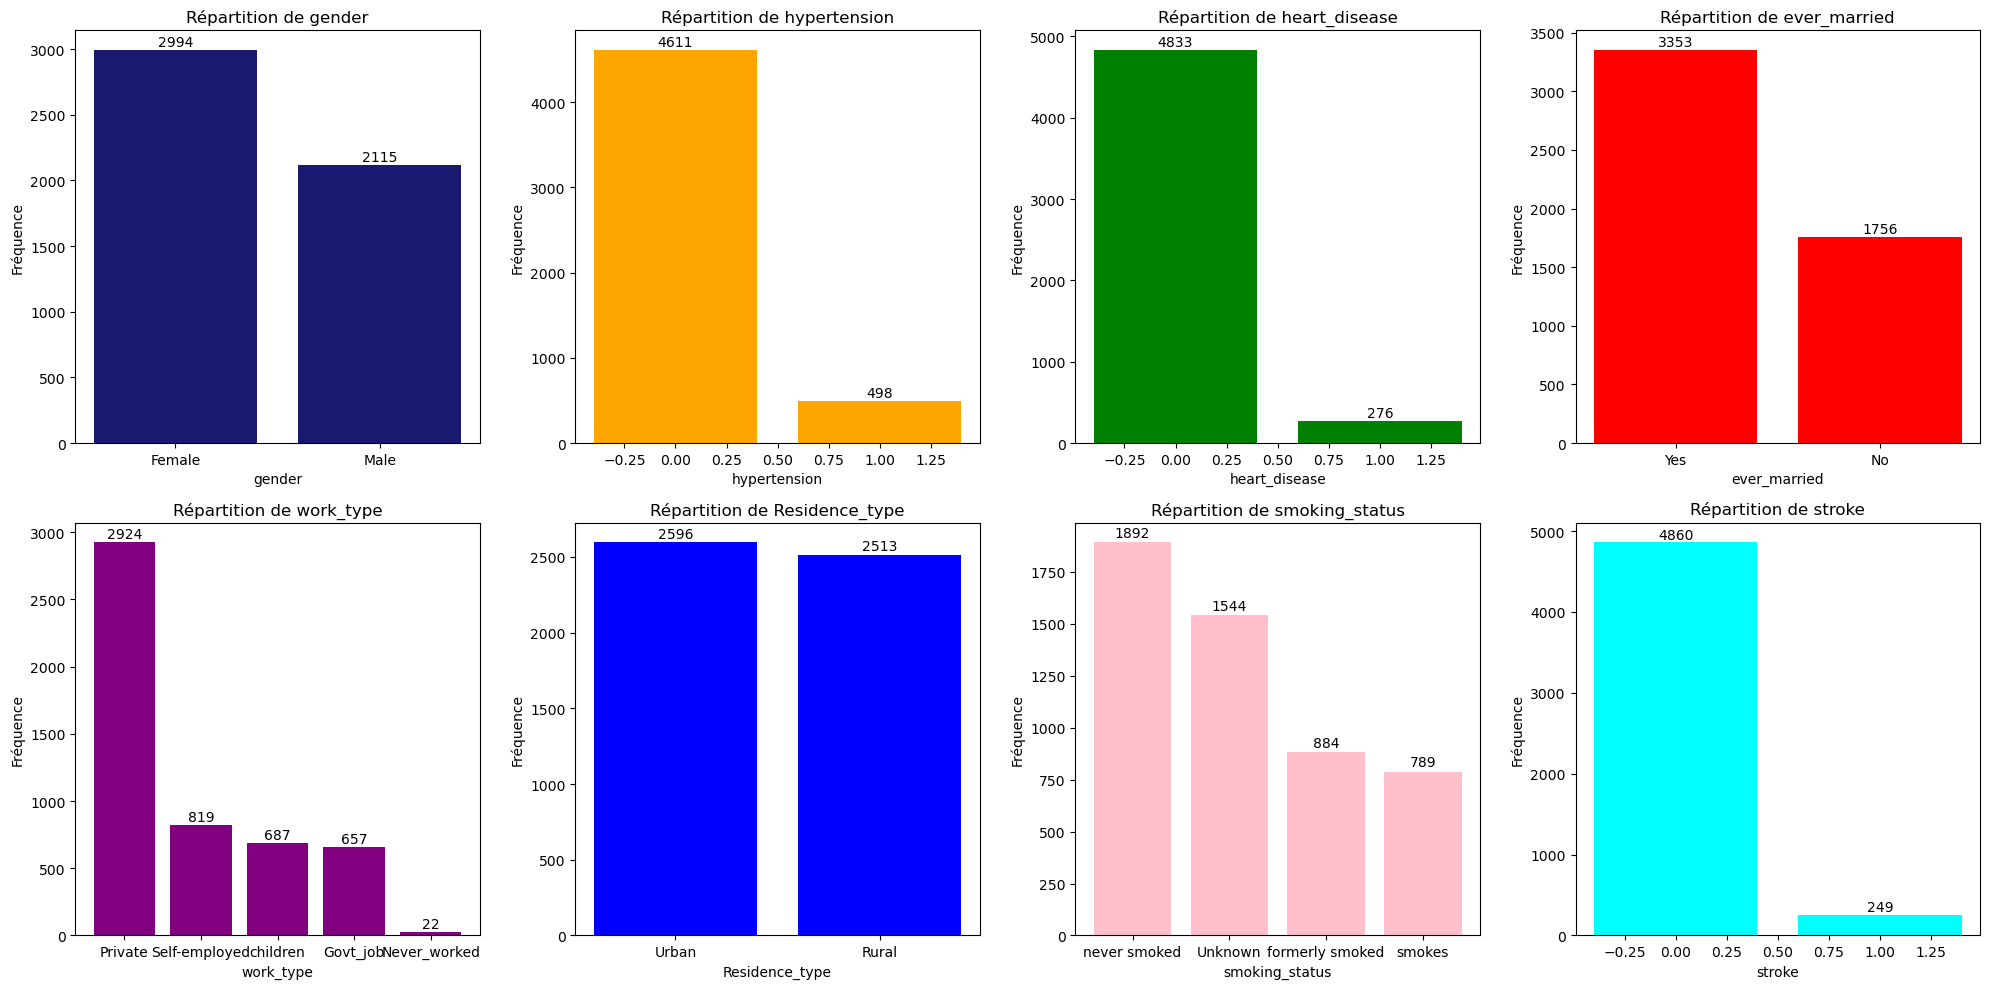

In [15]:
variables_qualitatives= ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status', 'stroke']
colors = ['midnightblue', 'orange', 'green', 'red', 'purple', 'blue', 'pink', 'cyan']

# Calcul du nombre de graphiques sur chaque rangée
num_total_variables = len(variables_qualitatives)
num_graphs_per_row = 4  # Quatre graphiques par ligne
num_rows = (num_total_variables + num_graphs_per_row - 1) // num_graphs_per_row

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(num_rows, num_graphs_per_row, figsize=(20, num_rows*5))

# Boucle pour générer les graphiques pour chaque variable qualitative + diagrammes en barres
for i, (variable, color) in enumerate(zip(variables_qualitatives, colors)):
    # Compter les occurrences de chaque catégorie
    counts = df[variable].value_counts()

    # Identifier les sous-graphiques
    row = i // num_graphs_per_row
    col = i % num_graphs_per_row

    # Diagramme en barres
    ax = axes[row, col]
    ax.bar(counts.index, counts.values, color=color)
    ax.set_title(f'Répartition de {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Fréquence')

    # Ajout des valeurs au-dessus des barres
    for j, count in enumerate(counts.values):
        ax.text(j, count + 10, str(count), ha='center', va='bottom')

# Ajuster l'espacement entre les sous-graphiques
plt.subplots_adjust(hspace=0.7, wspace=0.5)

plt.tight_layout()
plt.show()

In [16]:
df_patient_avc = df.loc[df['stroke'] == 1,:]
df_patient_avc.shape

(249, 12)

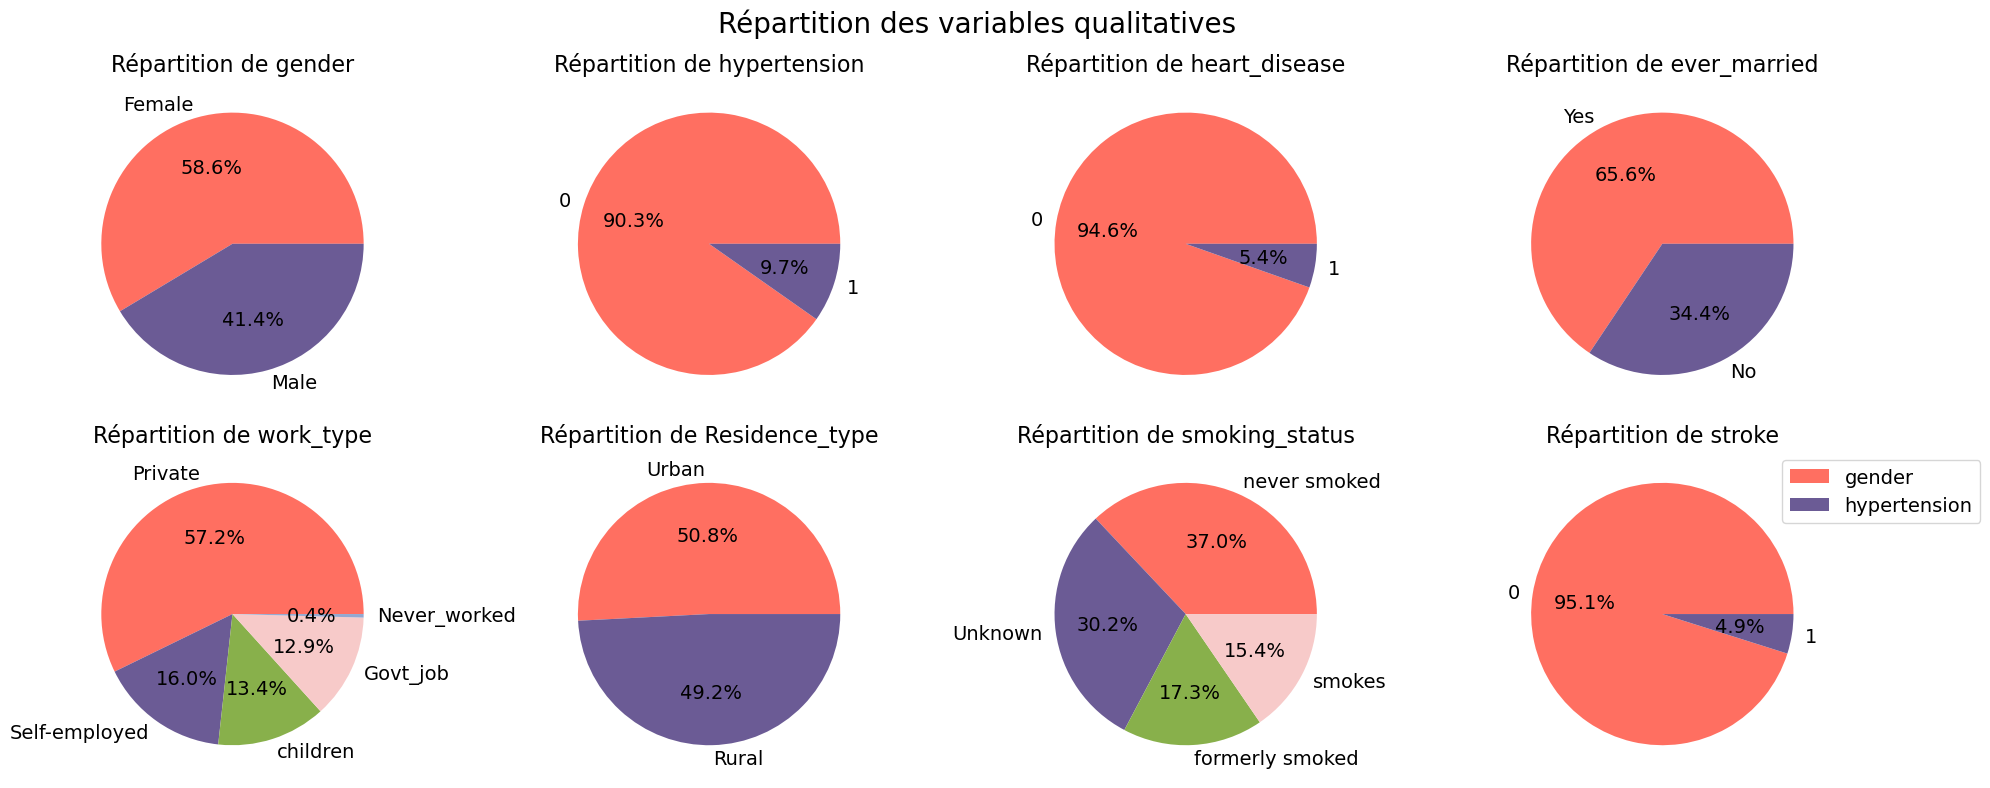

In [17]:
# Liste des variables qualitatives
variables_qualitatives = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251', '#B565A7', '#009B77']

# Calcul du nombre de graphiques sur chaque rangée
num_total_variables = len(variables_qualitatives)
num_graphs_per_row = 4  # Quatre graphiques par ligne
num_rows = (num_total_variables + num_graphs_per_row - 1) // num_graphs_per_row

# Définir la taille de la figure
figsize_width = 20  # Largeur de la figure
figsize_height = num_rows * 4  # Hauteur de la figure, ajustée en fonction du nombre de lignes

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(num_rows, num_graphs_per_row, figsize=(figsize_width, figsize_height))

# Boucle pour générer les graphiques pour chaque variable qualitative + diagrammes en camembert
for i, (variable, color) in enumerate(zip(variables_qualitatives, colors)):
    # Comptage des occurrences de chaque catégorie
    counts = df[variable].value_counts()
    row = i // num_graphs_per_row
    col = i % num_graphs_per_row

    # Diagramme en camembert
    ax = axes[row, col]
    ax.pie(counts, labels=counts.index, colors=colors[:len(counts)], autopct='%1.1f%%', textprops={'fontsize': 14})
    ax.set_title(f'Répartition de {variable}', fontsize=16)
    ax.set_ylabel('', fontsize=14)

# Ajouter et changer la taille de la police de la légende
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1), labels=variables_qualitatives, prop={'size': 14})

# Agrandir la police du titre de la figure
plt.suptitle('Répartition des variables qualitatives', fontsize=20)
plt.tight_layout()
plt.show()

In [18]:
# Supprimer les lignes avec des valeurs manquantes dans la colonne BMI
df_cleaned = df.dropna(subset=['bmi'])
df_cleaned.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


#  Analyses bivariées pour les variables quantitatives avec les trois methodes : Pearson, Spearman, Kendall

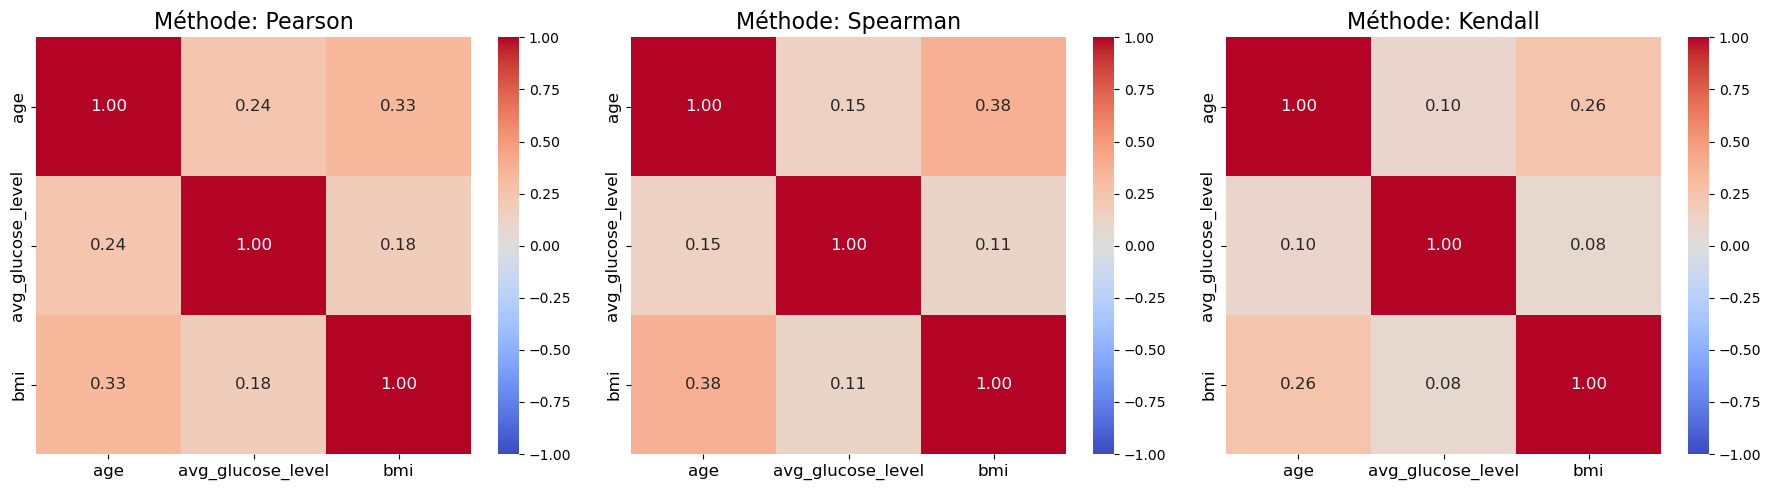

In [19]:
quantitative_columns = ['age', 'avg_glucose_level', 'bmi']

# Liste des méthodes de corrélation
methods = ['pearson', 'spearman', 'kendall']

# Créeation d'une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(1, len(methods), figsize=(18, 5))

# Boucle sur les méthodes de corrélation et génération des graphiques
for i, method in enumerate(methods):
    # Calcule de la matrice de corrélation avec la méthode spécifiée
    correlation_matrix = df[quantitative_columns].corr(method=method)
    
    # Création de la heatmap pour la matrice de corrélation
    heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12}, ax=axes[i],vmin=-1,vmax=1)
    heatmap.set_title(f'Méthode: {method.capitalize()}', fontsize=16)
    
    # Réduction de la taille des noms des colonnes sur les axes x et y
    heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12)
plt.tight_layout()
plt.show()

 Calcul de la corrélation bivariable de nos variables quantitatives avec la méthode "pointbiserialr" et suppression des lignes avec des valeurs NaN dans les colonnées utilisées pour le calcul

Corrélation bisériale entre Age et Stroke : 0.23, p-value : 0.0000
Corrélation bisériale entre Avg_glucose_level et Stroke : 0.14, p-value : 0.0000
Corrélation bisériale entre Bmi et Stroke : 0.04, p-value : 0.0030


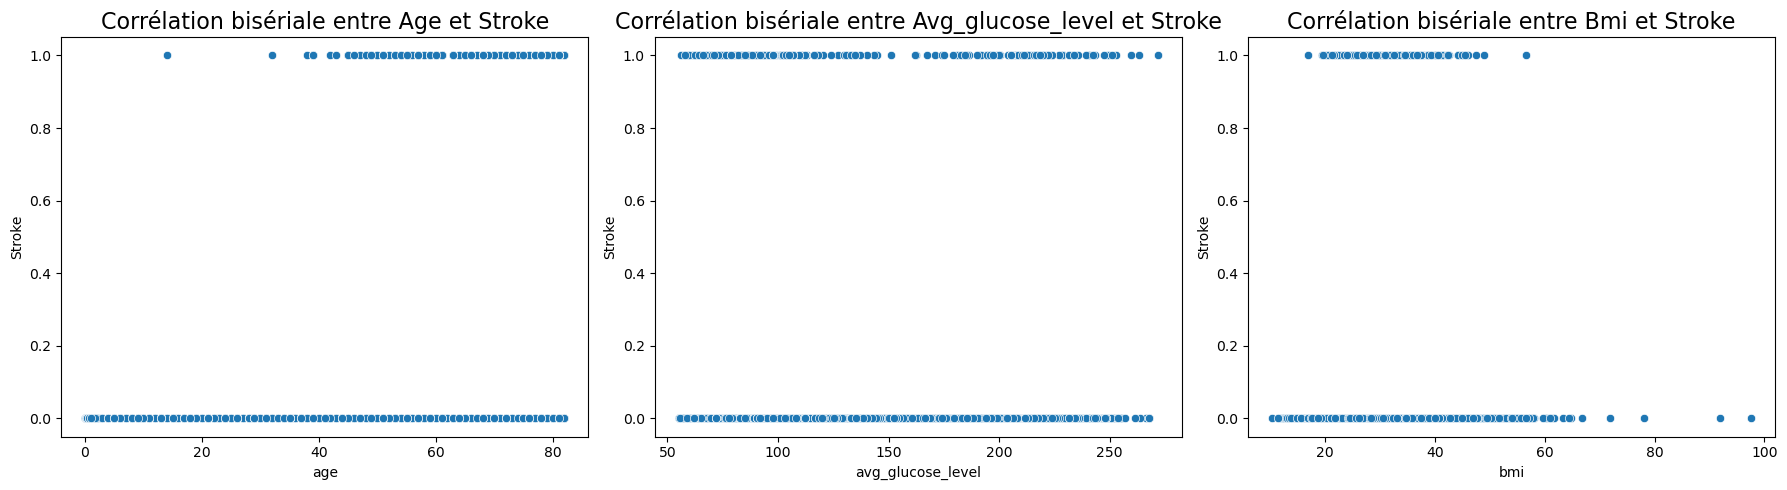

In [20]:
# Suppression des lignes contenant des valeurs NaN dans les colonnes utilisées pour le calcul de la corrélation
df_cleaned = df.dropna(subset=['stroke', 'age', 'avg_glucose_level', 'bmi'])

# Sélectionnez les colonnes quantitatives pour la corrélation avec stroke
quantitative_columns = ['age', 'avg_glucose_level', 'bmi']

# Création d'une figure avec une seule rangée et trois colonnes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tracé des graphiques pour chaque variable quantitative
for i, column in enumerate(quantitative_columns):
    # Calcul de la corrélation bisériale entre la variable quantitative et stroke
    correlation_coefficient, p_value = pointbiserialr(df_cleaned['stroke'], df_cleaned[column])
    
    # Affichage du coefficient de corrélation et de la valeur p
    print(f"Corrélation bisériale entre {column.capitalize()} et Stroke : {correlation_coefficient:.2f}, p-value : {p_value:.4f}")
    
    # Tracé du scatter plot avec la variable quantitative et la variable binaire (stroke)
    sns.scatterplot(data=df_cleaned, x=column, y='stroke', ax=axes[i])
    axes[i].set_title(f'Corrélation bisériale entre {column.capitalize()} et Stroke', fontsize=16)
    axes[i].set_ylabel('Stroke')
    axes[i].set_xlabel(column)

# Ajustement automatique des espaces entre les sous-graphiques
plt.tight_layout()
plt.show()

Nous remarquons une petite corrélation entre l'attribut 'Age' et 'bmi', afin de mieux visualiser le type de relation entre ces deux attributs, nous allons afficher le graphe suivant:

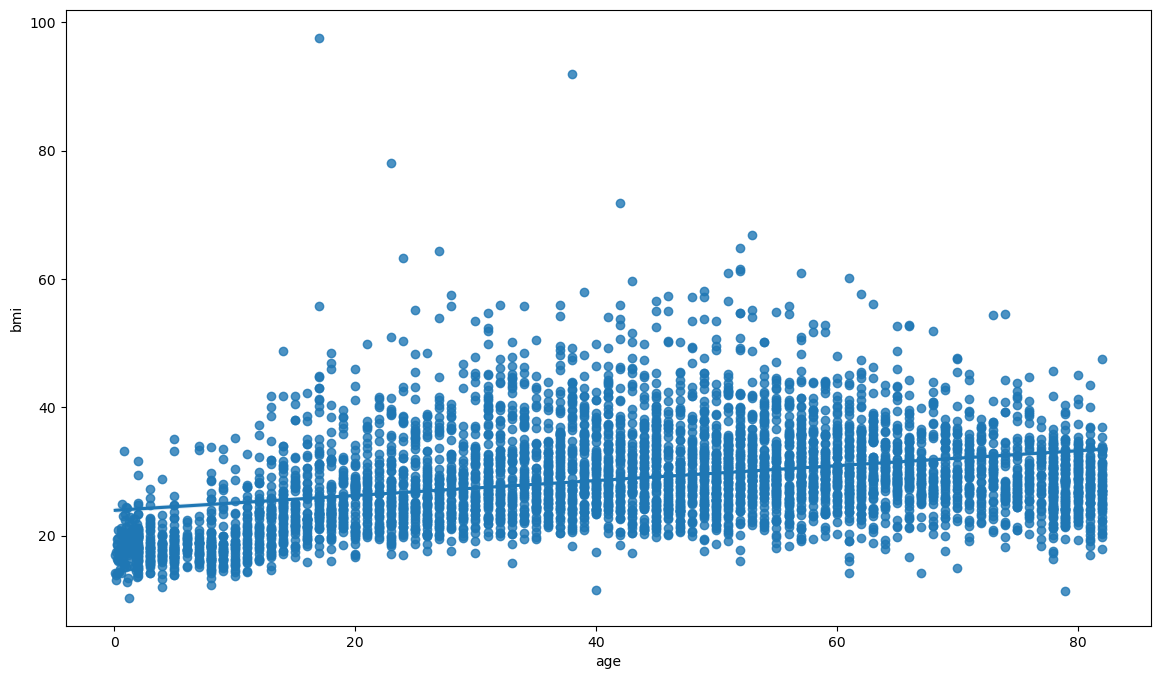

In [21]:
plt.figure(figsize=(14, 8))
sns.regplot(x = "age", y = "bmi", data = df)
plt.show()

Nous remarquons que l'âge augmente, ainsi que l'indice de masse corporelle

Iterpretation de la correlation concernant les variables quantitatives:
Corrélation AGE et AVC :

- Plus la valeur de la corrélation est proche de 1 plus les patients âgés ont tendance à avoir un risque plus élevé d'AVC
- La corrélation négative forte(-1, ou proche de -1) indique que les jeunes dans notre cas ont moins de chances d'avoir un AVC.
- La corrélation proche de 0 indique une faible correlation entre l'AGE et l'AVC

Corrélation entre le niveau moyen de glucose et l'AVC :

- La corrélation positive forte montre que les niveaux plus élevés de glucose moyen sont associés à un risque plus élevé d'AVC
- Une corrélation négative forte indique le contraire, soit que des niveaux plus faibles de glucose moyen sont associés à un risque plus élevé d'AVC.
- Une corrélation proche de zéro indique une faible corrélation entre le niveau moyen de glucose et l'AVC.

Corrélation entre le BMI (Indice de masse corporelle) et l'AVC :

- Une corrélation positive forte indique que des valeurs plus élevées de BMI sont associées à un risque plus élevé d'AVC.
- Une corrélation négative forte indique le contraire, soit que des valeurs plus faibles de BMI sont associées à un risque plus élevé d'AVC.
- Enfin, une corrélation proche de zéro indique une faible corrélation entre le BMI et l'AVC.

Pour résumé notre analyse concernant les variables quantitatives, nous voulons dire qu'un coefficient de corrélation proche de 1 indique une corrélation positive forte, un coefficient proche de -1 indique une corrélation négative forte, et un coefficient proche de zéro indique une faible corrélation. 
Il est important de tenir compte du fait que la corrélation ne signifie pas nécessairement une relation de causalité.

#  Analyses bivariées pour les variables qualitatives avec la méthode test du Chi-deux

La methode **Chi-deux** est utilisé pour garder l'independance des variables entre elles.
- Si la valeur p est inférieure à un seuil prédéfini (généralement 0,05), on rejette l'hypothèse nulle et on conclut qu'il y a une association significative entre les variables catégorielles. 
- Sinon, on ne rejette pas l'hypothèse nulle et on conclut qu'il n'y a pas suffisamment de preuves pour affirmer une relation entre les variables.

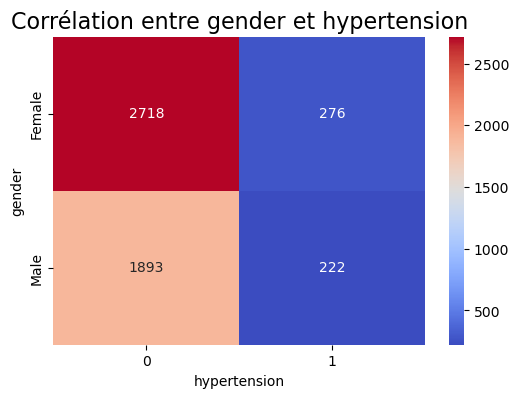

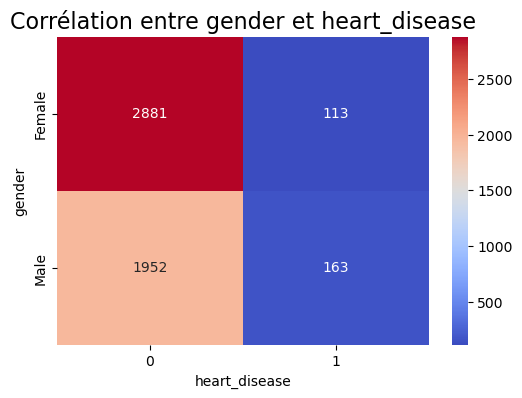

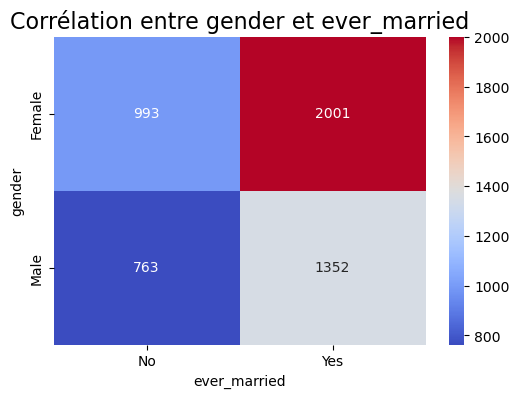

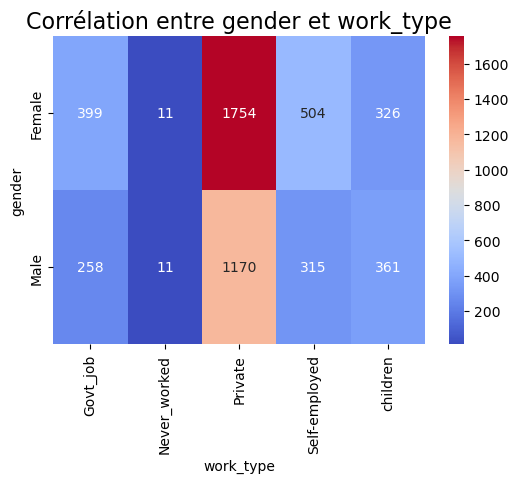

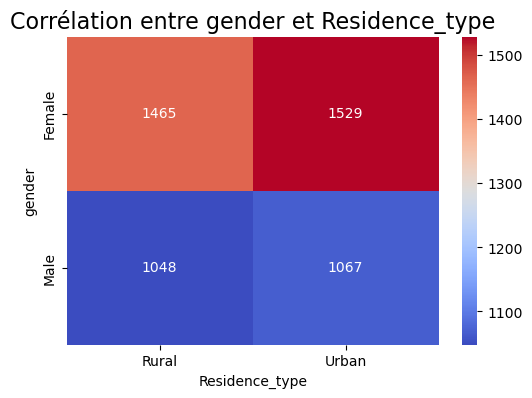

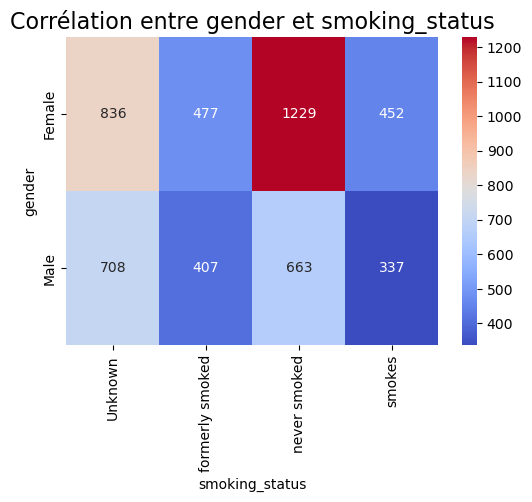

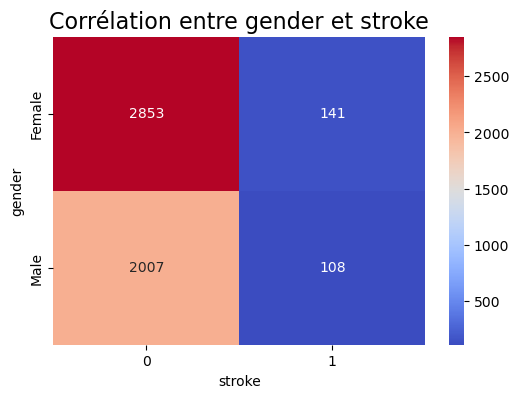

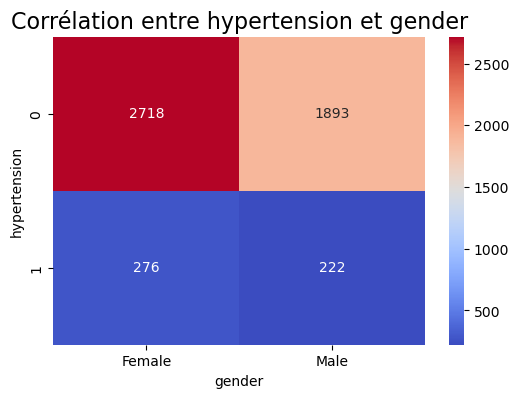

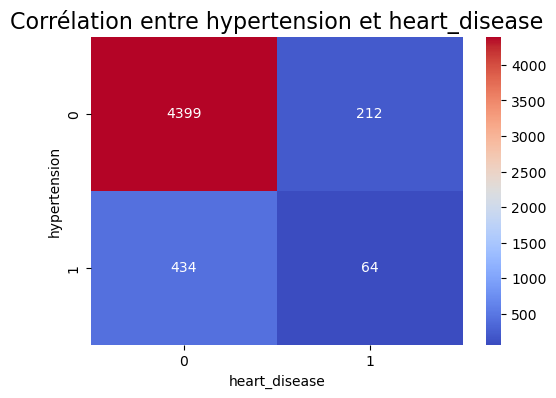

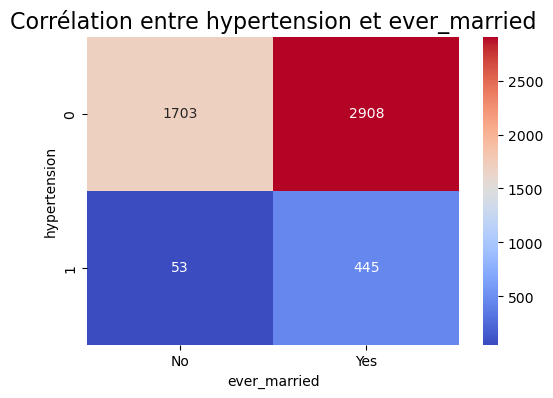

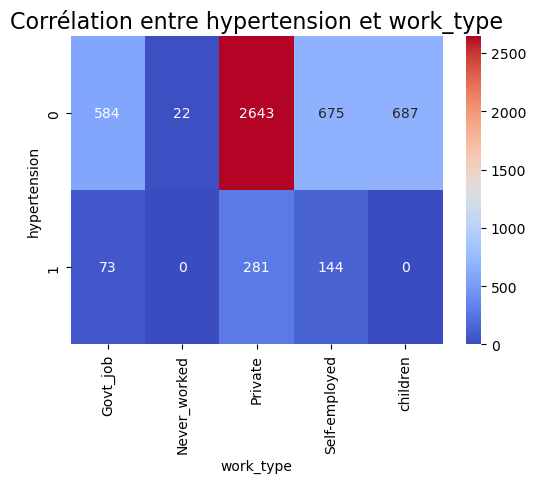

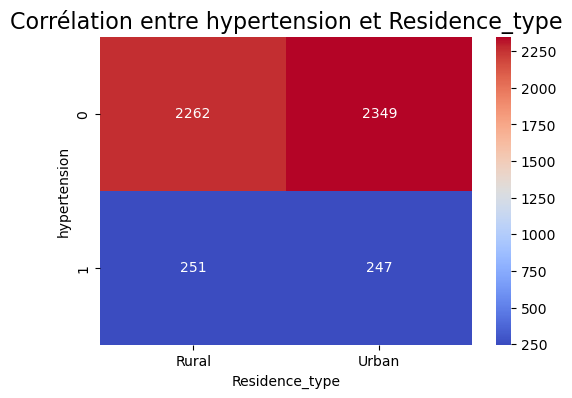

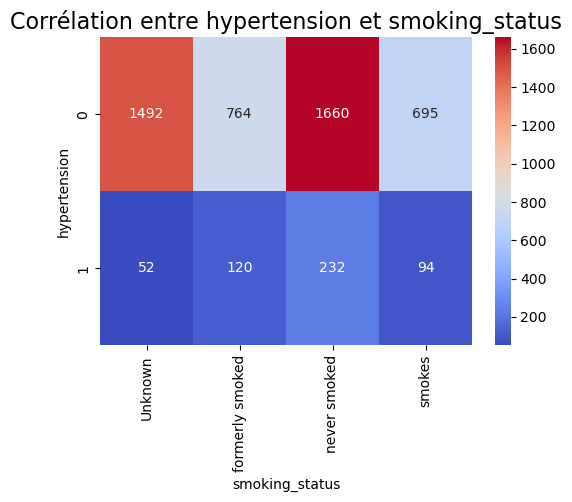

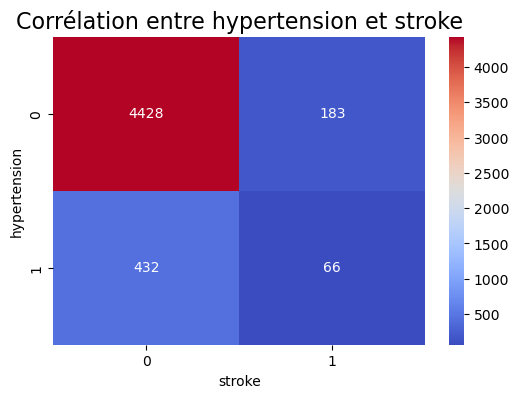

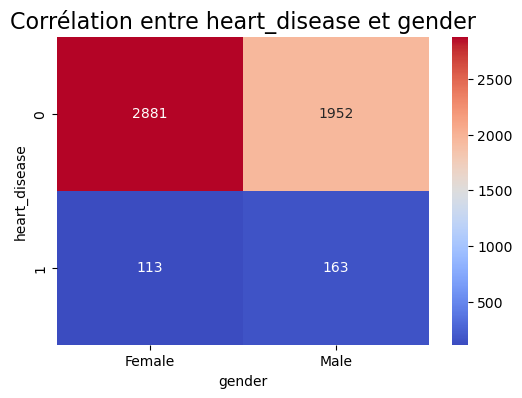

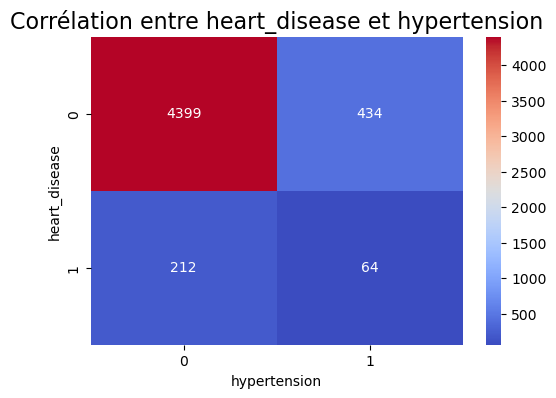

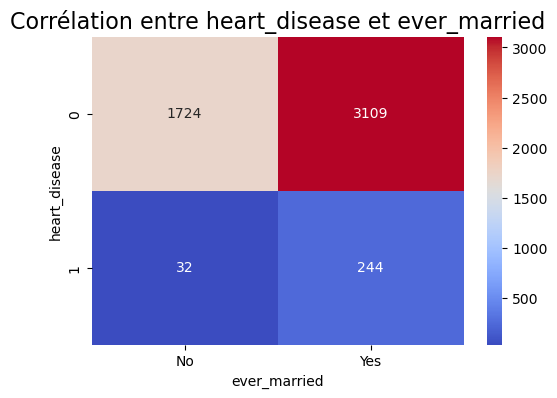

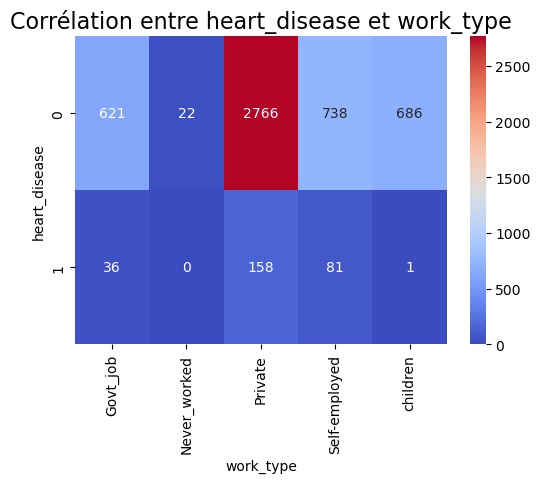

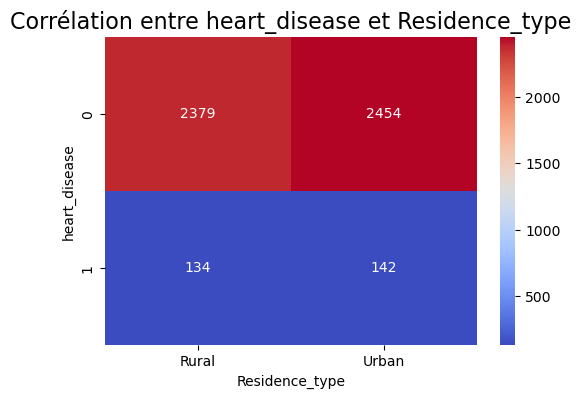

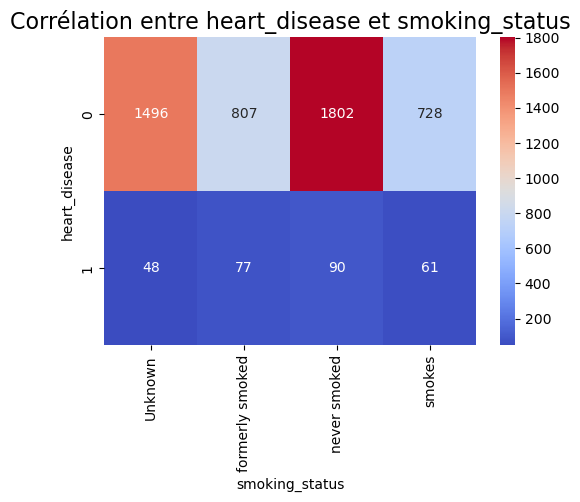

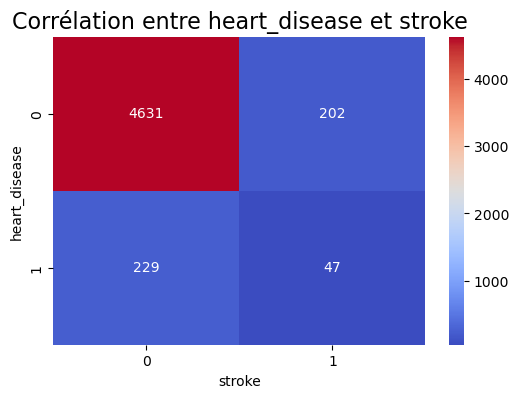

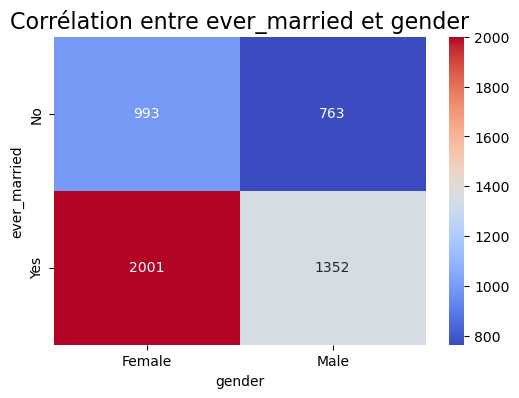

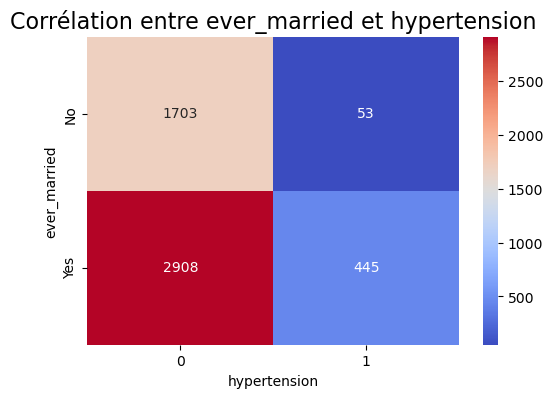

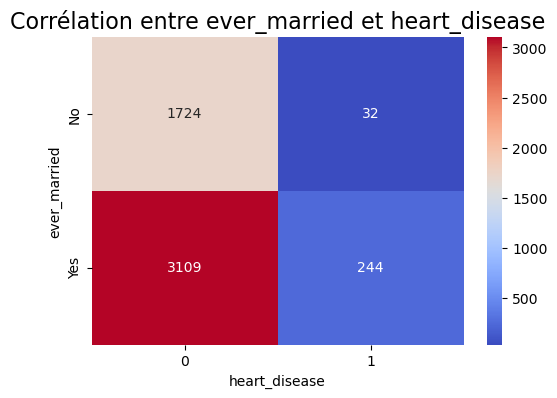

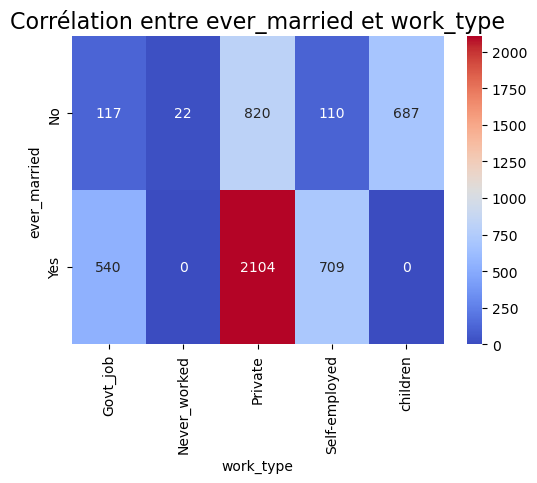

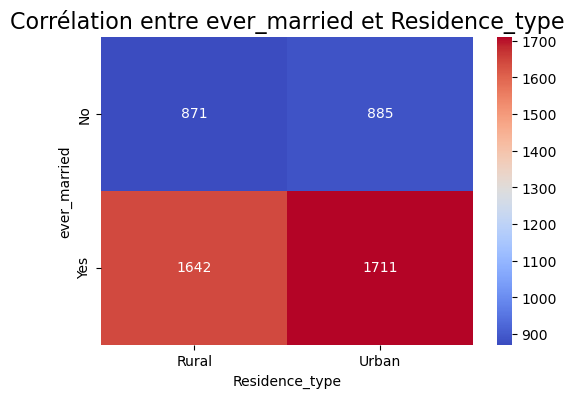

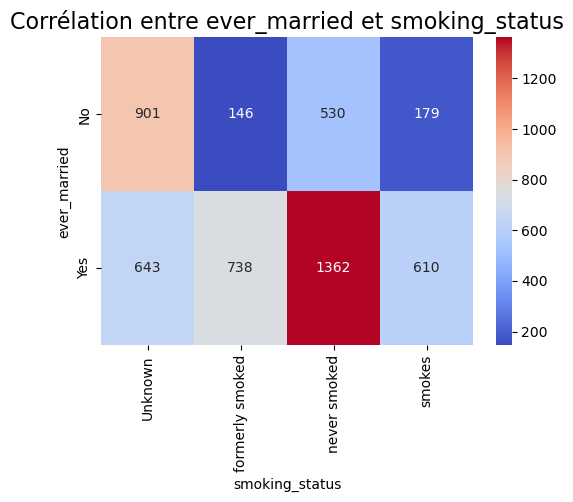

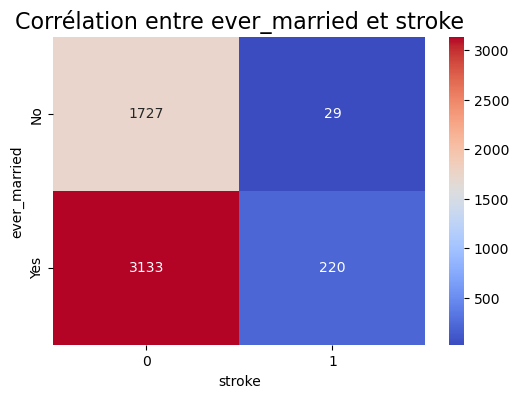

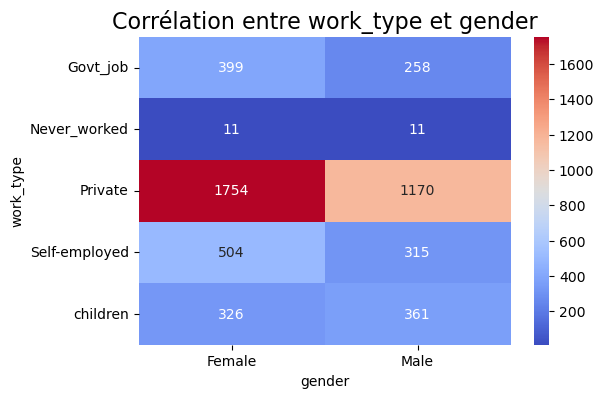

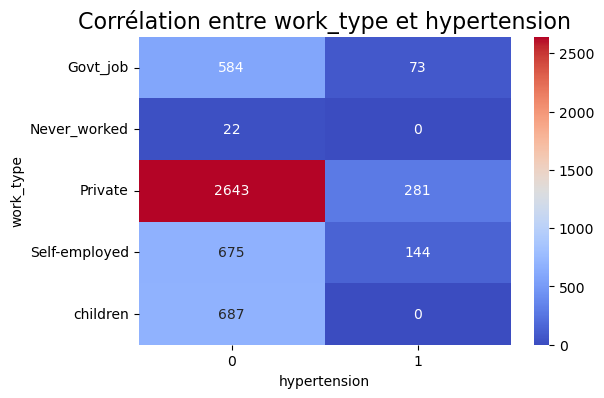

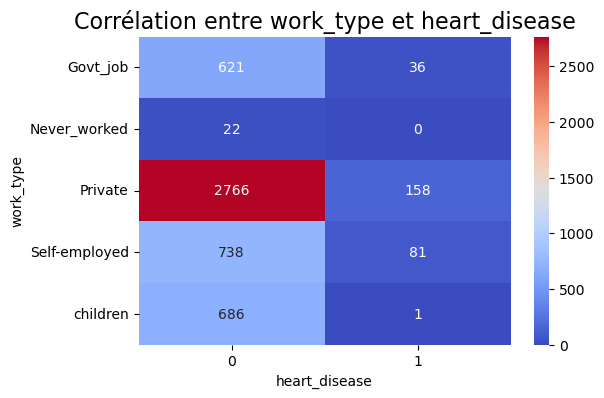

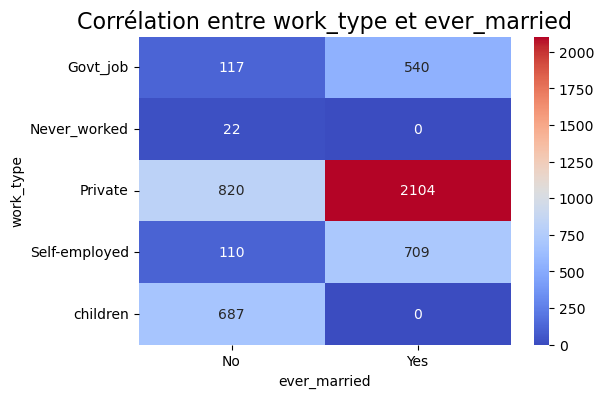

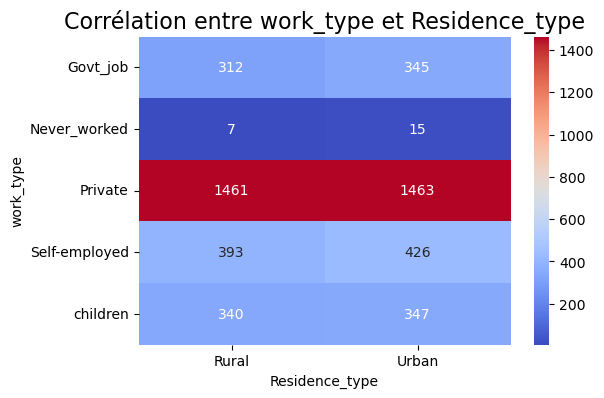

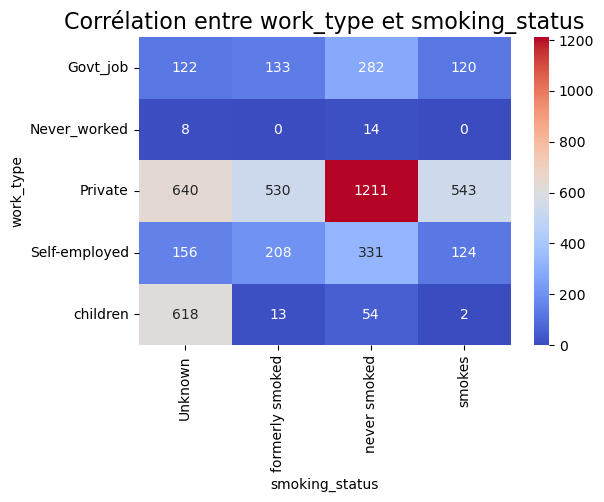

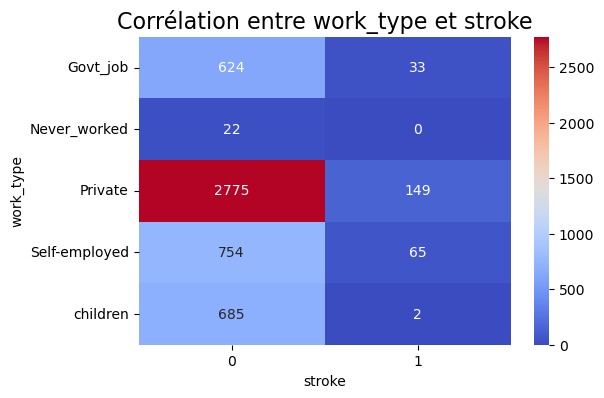

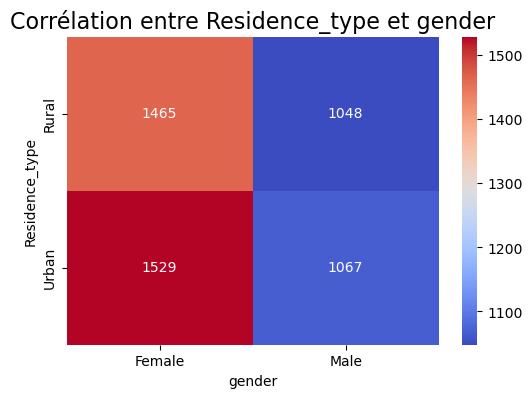

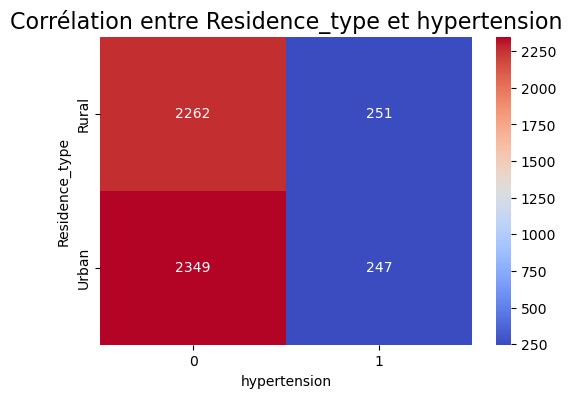

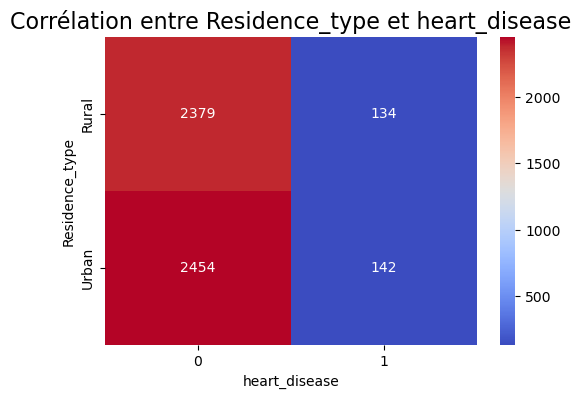

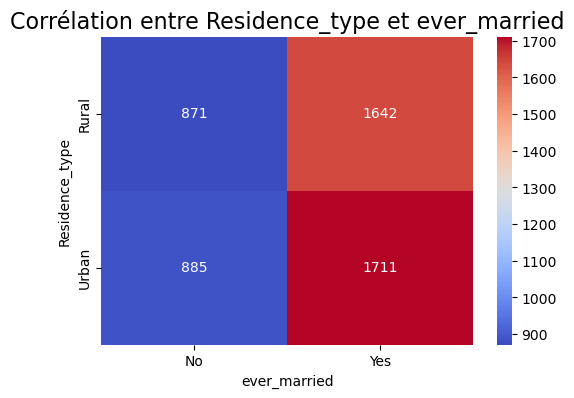

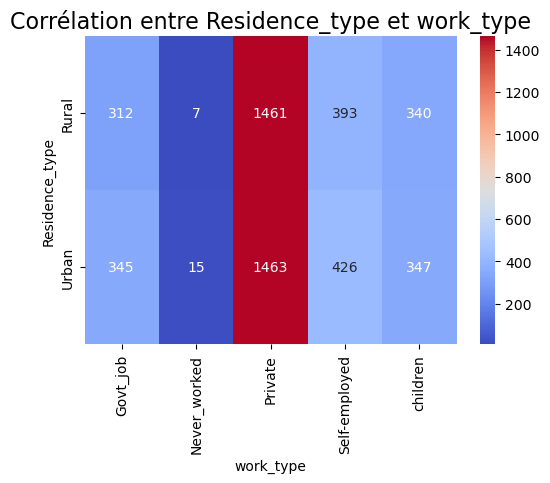

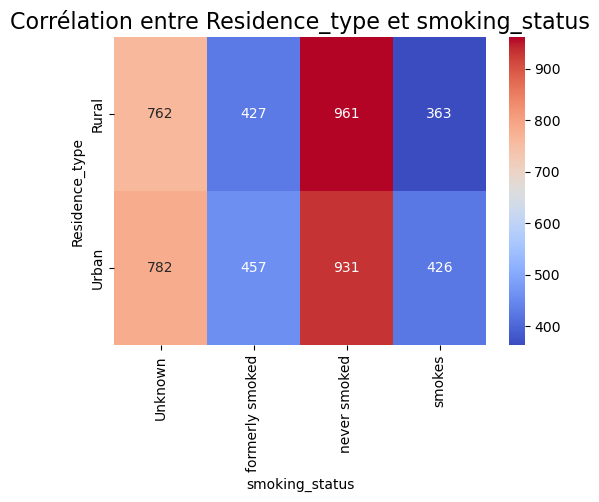

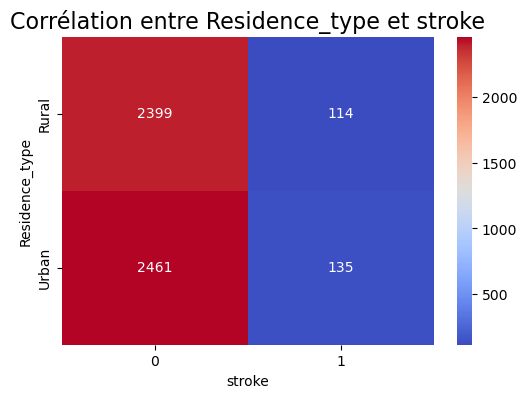

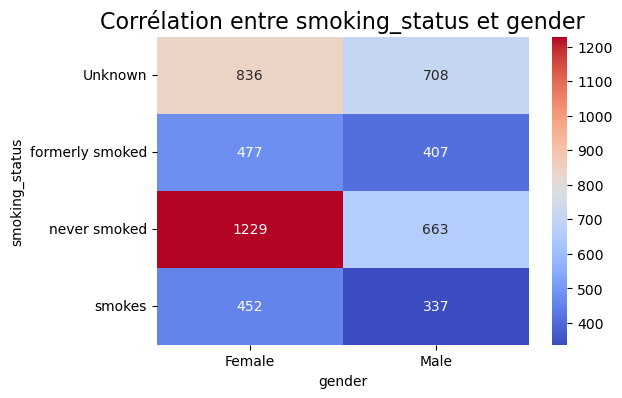

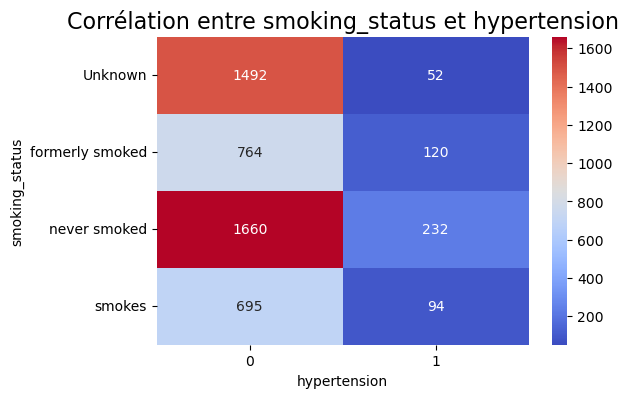

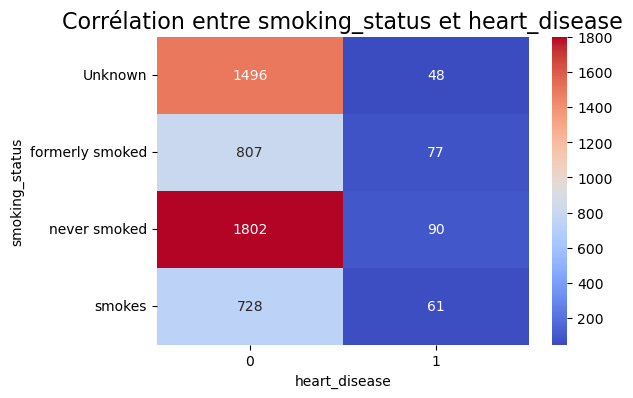

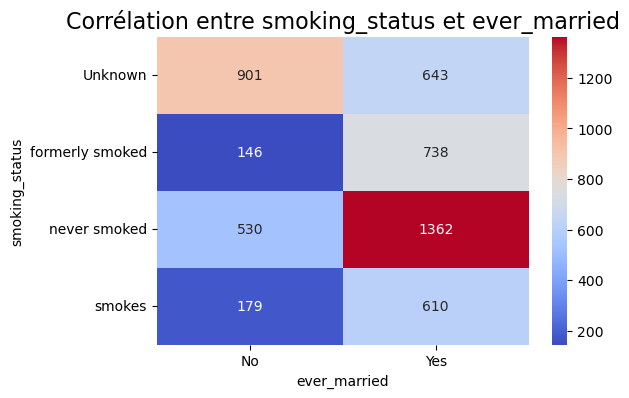

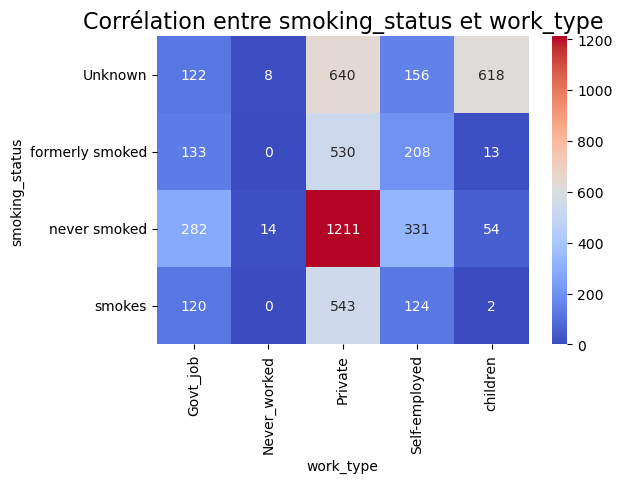

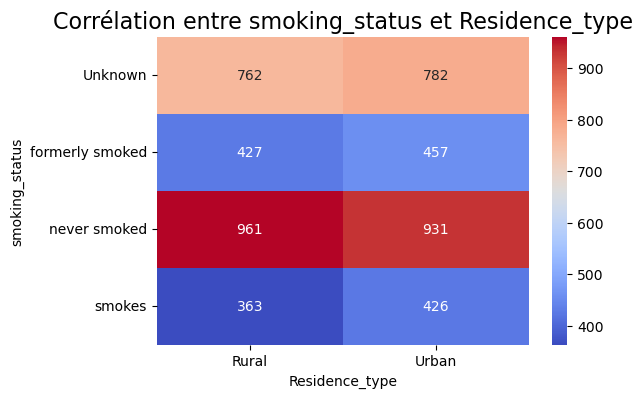

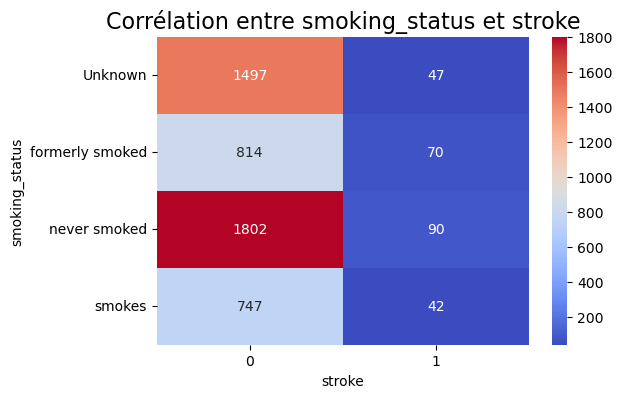

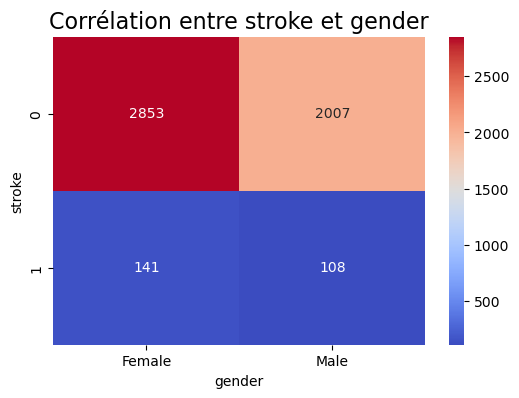

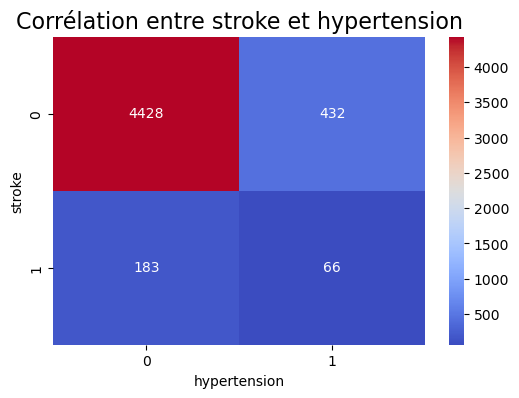

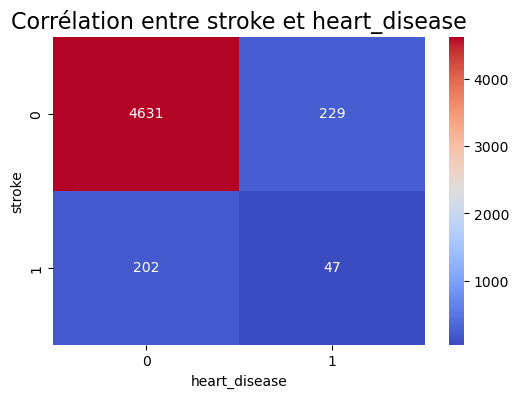

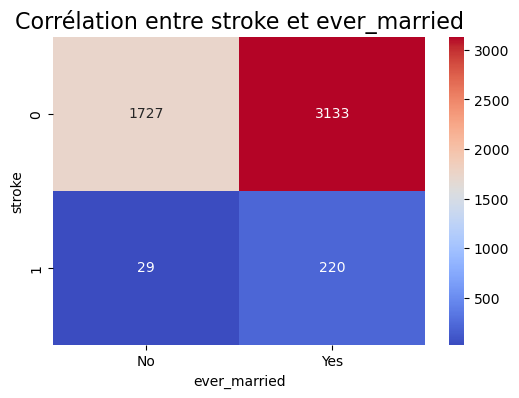

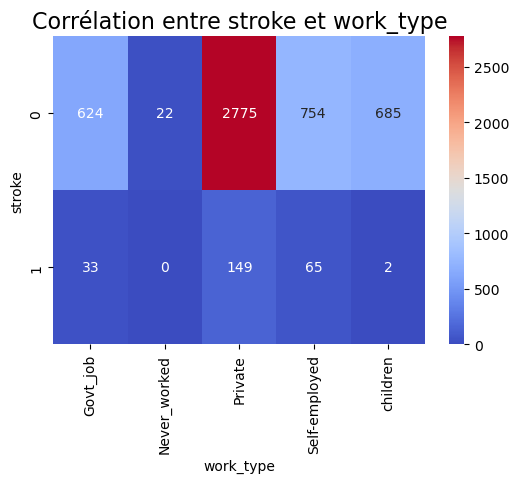

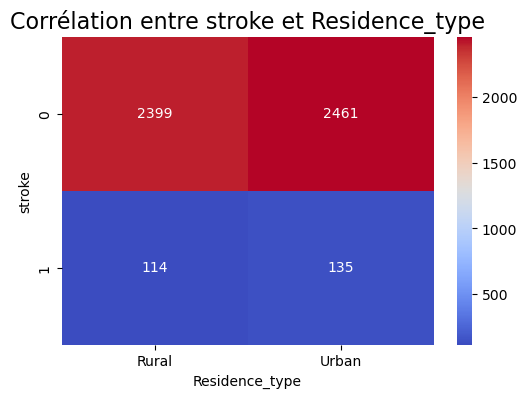

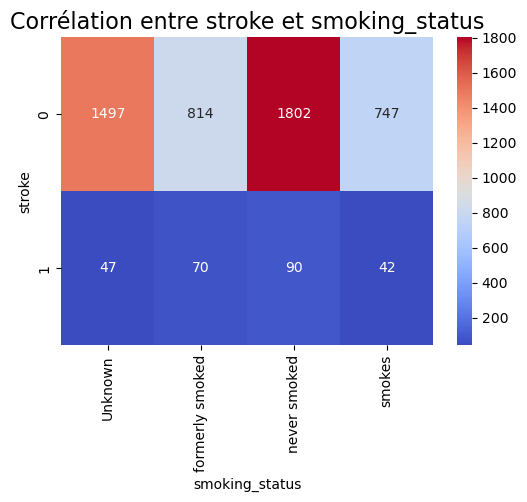

In [22]:
from scipy.stats import chi2_contingency

# Sélection des colonnes qualitatives pour le calcul de la corrélation
variables_qualitatives = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
correlation_df = df[variables_qualitatives]

# Calcul de la matrice de corrélation en utilisant le test du Chi-deux
for var1 in correlation_df.columns:
    for var2 in correlation_df.columns:
        if var1 != var2:  # Pour éviter de calculer la corrélation d'une variable avec elle-même
            corr_matrix = pd.crosstab(correlation_df[var1], correlation_df[var2])
            chi2, p, _, _ = chi2_contingency(corr_matrix)
            corr_value = np.sqrt(chi2 / (chi2 + len(df)))

            # Tracé du heatmap
            plt.figure(figsize=(6, 4))
            heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".0f", annot_kws={"size": 10})
            plt.title(f'Corrélation entre {var1} et {var2}', fontsize=16)
            plt.xlabel(var2)
            plt.ylabel(var1)
            plt.show()

# Comparaison de l'âge moyen des patients ayant eu un AVC avec ceux qui n'en ont pas eu avec test T

In [23]:
from scipy import stats
# Séparer les données en deux groupes : patients avec AVC et patients sans AVC
avc_group = df[df['stroke'] == 1]['age']
no_avc_group = df[df['stroke'] == 0]['age']

# Calcul de l'âge moyen pour chaque groupe
avc_mean_age = avc_group.mean()
no_avc_mean_age = no_avc_group.mean()

# Effectuer un test t pour évaluer s'il existe une différence significative entre les deux groupes
t_statistic, p_value = stats.ttest_ind(avc_group, no_avc_group)

# Afficher les résultats
print(f"Âge moyen des patients ayant eu un AVC : {avc_mean_age:.2f} ans")
print(f"Âge moyen des patients n'ayant pas eu d'AVC : {no_avc_mean_age:.2f} ans")
print(f"\nTest t-statistique : {t_statistic:.2f}")
print(f"Valeur de p : {p_value:.4f}")

# Interprétation
if p_value < 0.05:
    print("\nIl existe une différence significative dans l'âge moyen entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.")
else:
    print("\nIl n'existe pas de différence significative dans l'âge moyen entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.")

Âge moyen des patients ayant eu un AVC : 67.73 ans
Âge moyen des patients n'ayant pas eu d'AVC : 41.97 ans

Test t-statistique : 18.08
Valeur de p : 0.0000

Il existe une différence significative dans l'âge moyen entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.


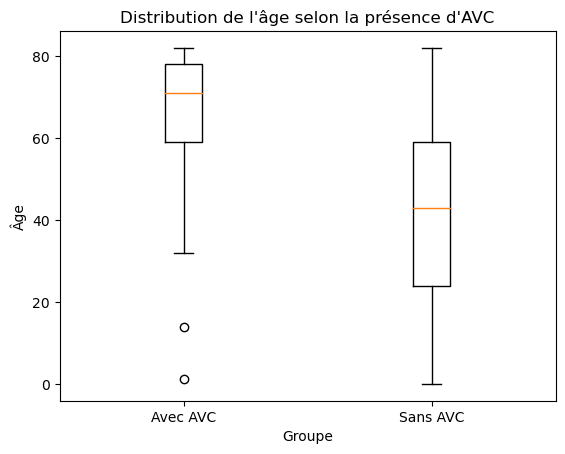

In [24]:
# Données à représenter
data = [avc_group, no_avc_group]
# Création du graphique en boîte
plt.boxplot(data, labels=['Avec AVC', 'Sans AVC'])

plt.xlabel('Groupe')
plt.ylabel('Âge')
plt.title('Distribution de l\'âge selon la présence d\'AVC')
plt.show()

# Comparaison des patients fumeurs et non fumeurs ayant eu un AVC avec ceux qui n'en ont pas eu avec test T

In [25]:
# Séparer les données en deux groupes : patients fumeurs et patients non fumeurs
smoker_group = df[df['smoking_status'] == 'smokes']['age']
non_smoker_group = df[df['smoking_status'] == 'never smoked']['age']

# Calcul de l'âge moyen pour chaque groupe
smoker_mean_age = smoker_group.mean()
non_smoker_mean_age = non_smoker_group.mean()

# Effectuer un test t pour évaluer s'il existe une différence significative entre les deux groupes
t_statistic, p_value = stats.ttest_ind(smoker_group, non_smoker_group)

# Afficher les résultats
print(f"Âge moyen des patients fumeurs : {smoker_mean_age:.2f} ans")
print(f"Âge moyen des patients non fumeurs : {non_smoker_mean_age:.2f} ans")
print(f"\nTest t-statistique : {t_statistic:.2f}")
print(f"Valeur de p : {p_value:.4f}")

# Interprétation
if p_value < 0.05:
    print("\nIl existe une différence significative dans l'âge moyen entre les patients fumeurs et non fumeurs.")
else:
    print("\nIl n'existe pas de différence significative dans l'âge moyen entre les patients fumeurs et non fumeurs.")

Âge moyen des patients fumeurs : 47.10 ans
Âge moyen des patients non fumeurs : 46.74 ans

Test t-statistique : 0.44
Valeur de p : 0.6598

Il n'existe pas de différence significative dans l'âge moyen entre les patients fumeurs et non fumeurs.


Au vue des résultats de notre analyse nous pouvons conclure que le fait de fumer ou pas n'implique pas une prédestination à être sujet aux AVC pour les patients

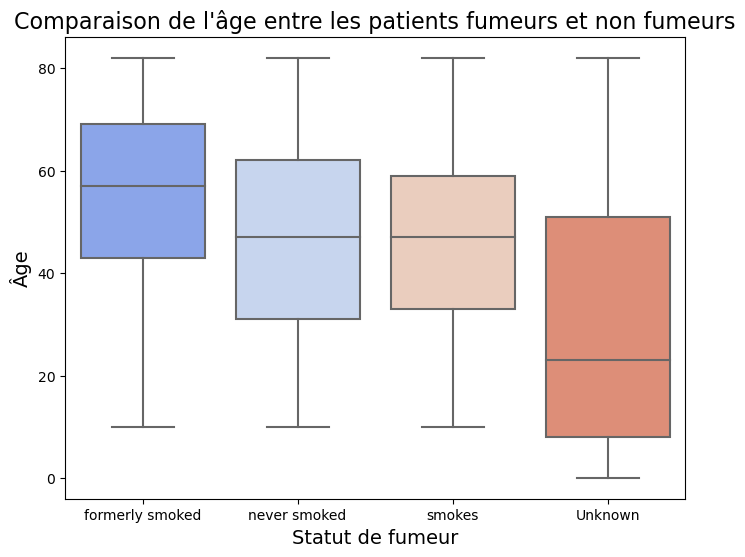

In [26]:
# Création du graphique boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoking_status', y='age', data=df, palette='coolwarm')

# Ajout de titres et d'étiquettes
plt.title("Comparaison de l'âge entre les patients fumeurs et non fumeurs", fontsize=16)
plt.xlabel('Statut de fumeur', fontsize=14)
plt.ylabel('Âge', fontsize=14)
plt.show()

# Calcul de la prévalence (proportion) de l'hypertension et des maladies cardiaques chez les patients ayant et n'ayant pas eu d'AVC.

In [27]:
# Calculer la prévalence de l'hypertension et des maladies cardiaques pour les patients ayant et n'ayant pas eu d'AVC
hypertension_avc = df[df['stroke'] == 1]['hypertension'].mean()
heart_disease_avc = df[df['stroke'] == 1]['heart_disease'].mean()
hypertension_no_avc = df[df['stroke'] == 0]['hypertension'].mean()
heart_disease_no_avc = df[df['stroke'] == 0]['heart_disease'].mean()

# Afficher les résultats
print("Prévalence de l'hypertension et des maladies cardiaques :")
print(f"\n- Chez les patients ayant eu un AVC :")
print(f"  - Hypertension : {hypertension_avc:.2%}")
print(f"  - Maladie cardiaque : {heart_disease_avc:.2%}")
print(f"\n- Chez les patients n'ayant pas eu d'AVC :")
print(f"  - Hypertension : {hypertension_no_avc:.2%}")
print(f"  - Maladie cardiaque : {heart_disease_no_avc:.2%}")

Prévalence de l'hypertension et des maladies cardiaques :

- Chez les patients ayant eu un AVC :
  - Hypertension : 26.51%
  - Maladie cardiaque : 18.88%

- Chez les patients n'ayant pas eu d'AVC :
  - Hypertension : 8.89%
  - Maladie cardiaque : 4.71%


Les résultats obtenus indique une nette difference dans la prévalance de l'hypertension et des maladies cardiaquesentre les patients ayant eu un AVC et ceux qui n'ont pas eu.
- La prévalance de l'hypertension est de 26.51% pour les patients ayant eu un AVC contre seulement 8.89% pour les patients n'ayant pas eu d'AVC
- De même, la prévalance des maladies cardiaques est également plus élevé pour les patients ayant eu un AVC (18.88%) contre (4.71%) par rapport à ceux qui n'ont pas eu.

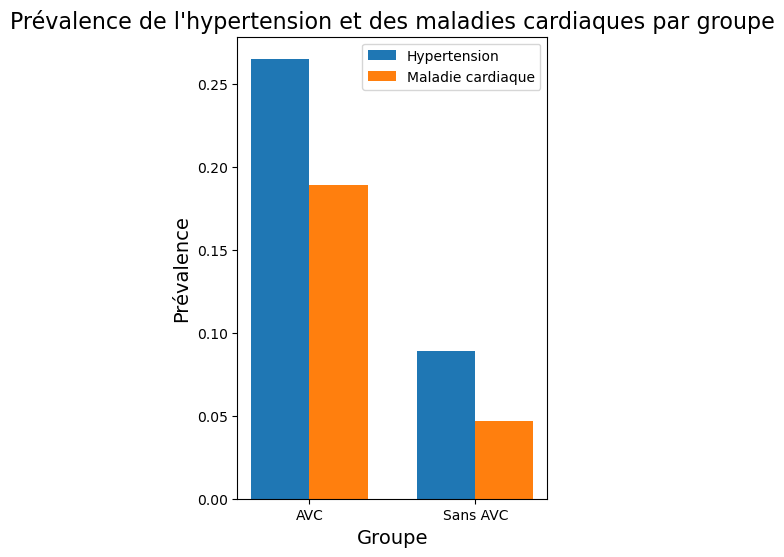

In [28]:
labels = ['AVC', 'Sans AVC']
hypertension_prevalence = [hypertension_avc, hypertension_no_avc]
heart_disease_prevalence = [heart_disease_avc, heart_disease_no_avc]

# Création du graphique
x = range(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(4,6))

# Ajout des barres pour l'hypertension
bar1 = ax.bar(x, hypertension_prevalence, width, label='Hypertension')

# Ajout des barres pour les maladies cardiaques
bar2 = ax.bar([i + width for i in x], heart_disease_prevalence, width, label='Maladie cardiaque')

# Ajout des titres et des étiquettes
ax.set_xlabel('Groupe', fontsize=14)
ax.set_ylabel('Prévalence', fontsize=14)
ax.set_title("Prévalence de l'hypertension et des maladies cardiaques par groupe", fontsize=16)
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [29]:
# Séparation des données en deux groupes : patients avec AVC et patients sans AVC
avc_group = df[df['stroke'] == 1]['bmi'].dropna()  # Exclure les valeurs NaN
no_avc_group = df[df['stroke'] == 0]['bmi'].dropna()  # Exclure les valeurs NaN

# Effectuer un test ANOVA pour évaluer s'il existe une différence significative entre les deux groupes
f_statistic, p_value = f_oneway(avc_group, no_avc_group)

print(f"Test ANOVA - Valeur F : {f_statistic:.2f}")
print(f"Valeur de p : {p_value:.4f}")

# Interprétation des résultats
alpha = 0.05
if p_value < alpha:
    print("\nIl existe une différence significative dans le BMI moyen entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.")
else:
    print("Il n'existe pas de différence significative dans le BMI moyen entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.")

Test ANOVA - Valeur F : 8.81
Valeur de p : 0.0030

Il existe une différence significative dans le BMI moyen entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.


In [30]:
# Supprimer les lignes contenant des valeurs NaN
df_cleaned = df.dropna()

# Vérifier la forme du DataFrame après la suppression des valeurs NaN
print("La forme du DataFrame après avoir supprimé les valeurs NaN:", df_cleaned.shape)
df.head()

La forme du DataFrame après avoir supprimé les valeurs NaN: (4908, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Après avoir supprimé les valeurs NaN nous avons crée la méthode test du chi-carré pour observer les associations significatives entre les variables

In [31]:
from scipy.stats import chi2_contingency

# Utilisez la boucle pour effectuer le test du chi-carré entre toutes les paires de variables
for var1 in df.columns:
    for var2 in df.columns:
        if var1 != var2:  # Pour éviter de comparer une variable avec elle-même
            contingency_table = pd.crosstab(df[var1], df[var2])
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            print(f"Test du chi-carré entre {var1} et {var2}:")
            print(f"Statistique du chi-carré: {chi2}")
            print(f"Valeur de p: {p_value}")
            if p_value < 0.05:   # Test de signification à un seuil de 5%
                print("Il existe une association significative entre les deux variables.")
            else:
                print("Il n'y a pas suffisamment de preuves pour conclure à une association significative.")
            print()

Test du chi-carré entre id et gender:
Statistique du chi-carré: 5109.000000000001
Valeur de p: 0.4934222025722661
Il n'y a pas suffisamment de preuves pour conclure à une association significative.

Test du chi-carré entre id et age:
Statistique du chi-carré: 526227.0
Valeur de p: 0.45975394744953124
Il n'y a pas suffisamment de preuves pour conclure à une association significative.

Test du chi-carré entre id et hypertension:
Statistique du chi-carré: 5109.0
Valeur de p: 0.4934222025722697
Il n'y a pas suffisamment de preuves pour conclure à une association significative.

Test du chi-carré entre id et heart_disease:
Statistique du chi-carré: 5109.0
Valeur de p: 0.4934222025722697
Il n'y a pas suffisamment de preuves pour conclure à une association significative.

Test du chi-carré entre id et ever_married:
Statistique du chi-carré: 5108.999999999999
Valeur de p: 0.4934222025722733
Il n'y a pas suffisamment de preuves pour conclure à une association significative.

Test du chi-carré e

Test du chi-carré entre heart_disease et id:
Statistique du chi-carré: 5109.0
Valeur de p: 0.4934222025722697
Il n'y a pas suffisamment de preuves pour conclure à une association significative.

Test du chi-carré entre heart_disease et gender:
Statistique du chi-carré: 36.743861733898285
Valeur de p: 1.3471411533574369e-09
Il existe une association significative entre les deux variables.

Test du chi-carré entre heart_disease et age:
Statistique du chi-carré: 544.46118437207
Valeur de p: 3.0828019828310378e-61
Il existe une association significative entre les deux variables.

Test du chi-carré entre heart_disease et hypertension:
Statistique du chi-carré: 58.31035373476515
Valeur de p: 2.2386283017948103e-14
Il existe une association significative entre les deux variables.

Test du chi-carré entre heart_disease et ever_married:
Statistique du chi-carré: 66.03593133085836
Valeur de p: 4.427770773371616e-16
Il existe une association significative entre les deux variables.

Test du chi-ca

Test du chi-carré entre avg_glucose_level et id:
Statistique du chi-carré: 20318492.999999255
Valeur de p: 0.2663151024434531
Il n'y a pas suffisamment de preuves pour conclure à une association significative.

Test du chi-carré entre avg_glucose_level et gender:
Statistique du chi-carré: 3978.8120055951154
Valeur de p: 0.48891516437515314
Il n'y a pas suffisamment de preuves pour conclure à une association significative.

Test du chi-carré entre avg_glucose_level et age:
Statistique du chi-carré: 407555.0465181922
Valeur de p: 0.9891817277104527
Il n'y a pas suffisamment de preuves pour conclure à une association significative.

Test du chi-carré entre avg_glucose_level et hypertension:
Statistique du chi-carré: 4182.017990178018
Valeur de p: 0.011668314042800252
Il existe une association significative entre les deux variables.

Test du chi-carré entre avg_glucose_level et heart_disease:
Statistique du chi-carré: 4169.7371063071805
Valeur de p: 0.01639775482016773
Il existe une associ

Test du chi-carré entre stroke et avg_glucose_level:
Statistique du chi-carré: 4170.735151717983
Valeur de p: 0.01595961498709929
Il existe une association significative entre les deux variables.

Test du chi-carré entre stroke et bmi:
Statistique du chi-carré: 405.89600432100093
Valeur de p: 0.6423799983518619
Il n'y a pas suffisamment de preuves pour conclure à une association significative.

Test du chi-carré entre stroke et smoking_status:
Statistique du chi-carré: 29.22572707549827
Valeur de p: 2.0077041756108317e-06
Il existe une association significative entre les deux variables.



Il semble qu'il existe des associations significatives entre plusieurs paires de variables dans nos données. Ces associations sont déterminées par le test du chi-carré, qui mesurent si les distributions observées des catégories dans les variables sont significativement différentes de ce à quoi on s'attendrait.

Par exemple, il existe des associations significatives entre :

- Le genre et l'âge : 
        Cela signifie que la répartition des âges diffère significativement entre les différents genres.
- Le genre et les maladies cardiaques : 
        Cela indique une différence significative dans la prévalence des maladies cardiaques entre les différents genres.
- Le statut matrimonial et l'hypertension : 
        Cela suggère une association significative entre le statut matrimonial et l'hypertension.
- Le type de travail et l'indice de masse corporelle (IMC) : 
        Cela indique une association significative entre le type de travail et l'IMC.
        
Par contre nous avons relevé le fait qu'il n'y a pas suffisamment de preuves pour conclure à une association significative entre d'autres paires de variables, comme le type de travail et la résidence.

# Modèle d'apprentissage automatique 

Il existe plussieurs types de modèle d'apprentissage automatique dont les plus utilisés sont:

- L'apprentissage supervisé, dans ce type d'apprentissage le modèle est entrainé sur un ensemble de données dont les résultats sont connus à l'avance. Le modèle apprend à prédire ces résultats en se basant sur les caractéristiques des données.
- L'apprentissage non supervisé, ce type d'apprentissage il cherche à découvrir des structures intrisèques ou des schémas de données.
- L'apprentissage semi-supervisé, Ce type d'apprentissage il utilise à la fois les données étiquetées et non étiquettées pour l'entrainement.(avantageuse si les données étiquetées sont difficile ou couteuses à obtenir mais que les données non étiquettées sont disponibles)
- L'apprentissage en ligne, ce modèl consiste à mettre à jour un modèle de manière itérative à mesure que de nouvelles données sont disponibles au lieu de réentrainer

Création d'une copie du DF pour préparer les données pour l'apprentissage automatique sans modifier le DF  d'origine

In [32]:
df_copy = df.copy()

# Préparation des données

Id n'est qu'un identifiant individuelle qui ne fournit pas d'information utile dans la prédiction de l'AVC. Nous eliminon donc cette colonne

In [33]:
df_copy.drop(['id'],axis=1, inplace=True)
df_copy.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Les valeurs manquantes de l'attribut "bmi" nous allons les remplacer avec la moyenne car ils sont de type numérique

In [34]:
# Calcul de la moyenne
mean_bmi = df_copy['bmi'].mean()
print(mean_bmi)

28.894559902200488


In [35]:
#Affectation de la moyenne calculé aux valeurs manquantes de l'attribut 'bmi'
df_copy = df_copy.fillna(mean_bmi)
df_copy.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [36]:
# Nous allons arrondir les âges pour ne plus avoir des valeurs float
df_copy['age'] = df_copy['age'].apply(lambda x: round(x))

<Axes: title={'center': 'Count (target)'}, xlabel='work_type'>

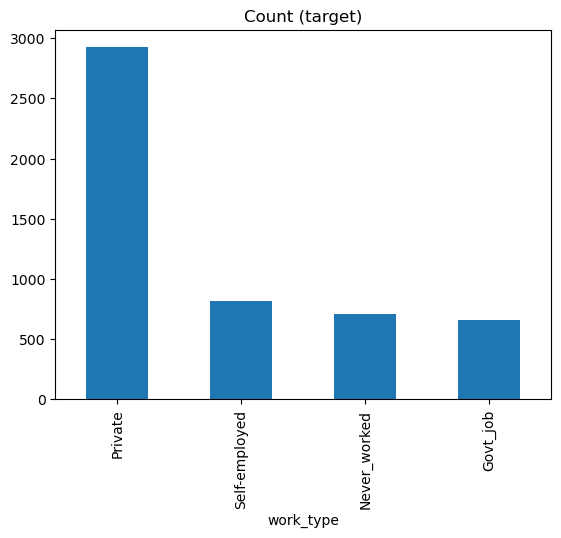

In [37]:
# Nous allons inclure le type de travail 'Children' dans la classification 'never_worked'.Même si cette classification 
#fait référence à des adultes qui n'ont jamais travaillé 
#il s'agit des informations qui sont aussi incluses dans la fonction 'âge'ce qui nous permet de les combiner
df_copy.loc[df['work_type'] == 'children','work_type'] = 'Never_worked'
df_copy.work_type.value_counts().plot(kind='bar', title='Count (target)')

Nous avons un grand nombre de personnes dont le status tabagique est inconnu. 
Nous allons modifier une partie de cette valeur en fonction de certains hypothèses réalistes.De cette façon 
nous allons pouvoir classer certains personnes selon leur âge, car il est moins probable que les jeunes fument

In [38]:
# Verification du nombre de jeunes definis comme 'smodkes' ou 'formerly smoked'
df_copy.loc[(df['age'] < 18) & (df['smoking_status'] == 'smokes'),['age','smoking_status']]

,age,smoking_status
762,17,smokes
1063,13,smokes
1512,12,smokes
2013,10,smokes
2181,17,smokes
2950,17,smokes
3496,16,smokes
4391,16,smokes
4793,17,smokes


In [39]:
df_copy.loc[(df_copy['age'] < 18) & (df_copy['smoking_status'] == 'formerly_smoked'),['age','smoking_status']]

,age,smoking_status


Compte tenue qu'il n'y à que 9 personnes de moins de 18 ans qui fument, donc une très petite population par rapport à
l'ensemble de nos données nous allons reclasser les personnes de moins de 16 ans en tant que fumeurs en 'never smoked' 

In [40]:
df_copy.loc[(df_copy['age'] < 16) & (df_copy['smoking_status'] == 'Unknown'),'smoking_status'] = 'never smoked'
df_copy.smoking_status.value_counts()

smoking_status
never smoked       2527
Unknown             909
formerly smoked     884
smokes              789
Name: count, dtype: int64

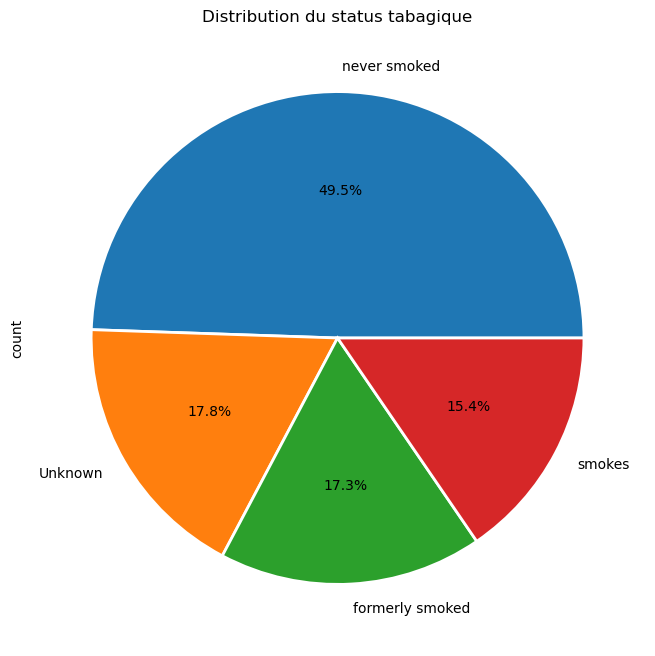

In [41]:
plt.figure(figsize=(12,8))
df_copy.smoking_status.value_counts().plot.pie(autopct="%.1f%%", wedgeprops={"linewidth":2,"edgecolor":"white"});
plt.title("Distribution du status tabagique")
plt.show()

Nous pouvons constater que nous avons réduit les inconnues de 1544 à 909. Cela confirme que notre hypothèse était bonne. Cependant le nombre reste élevé et peut affecté la façon dont cette caracthèristique semble liée à l'AVC 

Conversion des données catégorielles en données numériques

In [42]:
categories = ["work_type", "smoking_status"]
df_copy = pd.get_dummies(df_copy, columns=categories, dtype=int)
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
622,39601,Female,33.0,0,0,Yes,Private,Urban,69.40,47.8,never smoked,0
4183,47113,Female,67.0,0,0,Yes,Self-employed,Rural,110.42,24.9,never smoked,0
1164,53276,Female,49.0,0,0,Yes,Private,Urban,67.55,17.6,formerly smoked,0
4895,28717,Female,56.0,1,0,Yes,Private,Rural,177.56,30.1,never smoked,0
4218,16320,Female,11.0,0,0,No,children,Urban,102.76,20.3,Unknown,0
3829,6171,Male,6.0,0,0,No,children,Urban,90.60,16.6,Unknown,0
1645,14222,Female,25.0,0,0,No,Private,Urban,78.59,37.2,never smoked,0
1333,58101,Female,56.0,0,1,Yes,Private,Rural,64.66,26.7,formerly smoked,0
1046,5077,Male,45.0,0,0,Yes,Private,Urban,76.72,29.1,Unknown,0
2273,23223,Male,51.0,0,0,Yes,Private,Rural,239.28,35.0,never smoked,0


Nous allons utiliser LbelEncoder() pour les attributs avec 2 types

In [43]:
from sklearn.preprocessing import LabelEncoder

# Instancier le LabelEncoder
LE = LabelEncoder()
df_copy['gender'] = LE.fit_transform(df_copy['gender'])
df_copy['ever_married'] = LE.fit_transform(df_copy['ever_married'])
df_copy['Residence_type'] = LE.fit_transform(df_copy['Residence_type'])
df_copy.sample(10)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
463,0,78,0,0,1,0,115.43,27.8,0,0,0,0,1,0,0,1,0
4433,0,21,0,0,0,1,58.66,31.3,0,0,0,1,0,0,0,1,0
4494,1,54,0,0,0,0,106.52,27.4,0,0,0,1,0,0,1,0,0
147,0,78,0,0,1,1,67.29,24.6,1,0,0,1,0,0,0,1,0
1781,0,39,0,0,1,1,92.82,37.4,0,0,0,1,0,0,0,1,0
4366,1,66,0,0,1,0,189.82,28.8,0,0,0,0,1,0,1,0,0
4385,0,26,0,0,0,0,130.07,33.1,0,0,0,1,0,0,0,1,0
4980,0,19,0,0,0,1,100.60,20.5,0,0,0,1,0,0,0,1,0
577,0,51,1,0,1,1,109.16,28.0,0,0,0,1,0,0,0,0,1
4260,1,64,0,0,1,1,62.21,28.3,0,0,0,1,0,1,0,0,0


On remplace la variable cible stroke avec target et on la retire de notre DF. Ainsi la variable cible est séparer des caractéristiques que le modèle utilisera pour faire des prédictions. 

In [44]:
target= df_copy['stroke']
df_copy.drop(columns=['stroke'], inplace=True)

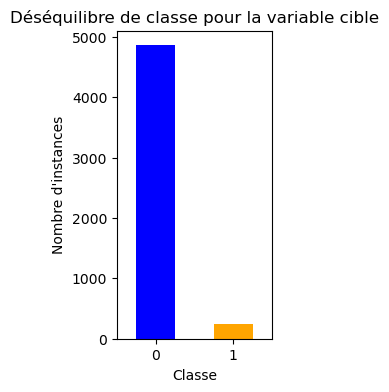

In [45]:
# Compter le nombre d'instances par classe dans la variable target
class_counts = target.value_counts()

# Visualiser le déséquilibre de classe
plt.figure(figsize=(2, 4))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Déséquilibre de classe pour la variable cible')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'instances')
plt.xticks(rotation=0)
plt.show()

In [46]:
print(target.sample(10))

731     0
1995    0
2017    0
4341    0
718     0
3018    0
2453    0
1460    0
3392    0
3276    0
Name: stroke, dtype: int64


In [47]:
print(target.describe())

count    5109.000000
mean        0.048738
std         0.215340
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stroke, dtype: float64


Les statistiques descriptives de la variable stroke nous montre une moyenne de 0.0487 ce qui signifie que seulement 4.87%
des valeurs dans cette variable sont égales à 1. Cela suggère un déséquilibre de classe car la majorité des valeurs, soit environs 95.13% sont égales à 0.
La veleur maximale 1 indique qu'il y a eu des personnes ayant subi un AVC dans notre ensemble de données, alors que la valeur minimale 0 nous indique l'existance des personnes qui n'en ont pas subi d'AVC. Cette information nous permet de compredre la distibution de notre variable stroke et de confirmer le déséquilibre de classe qui existe dans notre ensemble de données.

Comme notre F1-score est mauvais on va faire un "undersampling" aussi appelé sous-échantillonage. Le sous-echantillonage est une technique qui nous permettra d'équilibrer les ensembles de données inégaux en conservant toutes les données dans la classe minoritaire et en diminuant la taille de la classe majoritaire. Cette une des techniques que nous pouvons utiliser pour extraire des informations plus précises à partir d'ensemble de données déséquilibrés à l'origine. 

In [48]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=2, n_neighbors=3)
X, y = undersample.fit_resample(df_copy, target)

Standardisation des fonctionnalités de l'ensemble de données 'X' en utilisant StandardScaler de scikit-learn puis affichage des premières lignes du DF résultant

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df_copy)
scaled = pd.DataFrame(scaled, columns = df_copy.columns)
scaled.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.189791,1.051238,-0.328637,4.184599,0.723678,0.983884,2.706450,1.001034e+00,-0.384154,-0.401418,0.864444,-0.436931,-0.465219,2.186187,-0.989292,-0.427363
1,-0.840484,0.785886,-0.328637,-0.238972,0.723678,-1.016380,2.121652,4.615423e-16,-0.384154,-0.401418,-1.156812,2.288689,-0.465219,-0.457417,1.010824,-0.427363
2,1.189791,1.626168,-0.328637,4.184599,0.723678,-1.016380,-0.004867,4.683922e-01,-0.384154,-0.401418,0.864444,-0.436931,-0.465219,-0.457417,1.010824,-0.427363
3,-0.840484,0.255181,-0.328637,-0.238972,0.723678,0.983884,1.437473,7.152261e-01,-0.384154,-0.401418,0.864444,-0.436931,-0.465219,-0.457417,-0.989292,2.339933
4,-0.840484,1.581943,3.042866,-0.238972,0.723678,-1.016380,1.501297,-6.358651e-01,-0.384154,-0.401418,-1.156812,2.288689,-0.465219,-0.457417,1.010824,-0.427363


Nous allos utiliser la fonction "train_test_split" pour diviser notre ensemble de données en un ensemble d'entrainement et un ensemble de test. Nos données sont divisé de manière à ce que 80% des données soient utilisées pour l'entrainement (x_train et y_train) et 20% sont utilisé pour le test (x_test et y_test). Le random_state sert à garantir la reproductibilité de la division c'est à dire que les mêmes données seront utilisées pour l'entrainement et le test à chaque exécution du code

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

print("Dimensions de l'ensemble d'entraînement échantillons et caractéristiques (X_train) :", X_train.shape)
print("Dimensions de l'ensemble de test  échantillons et caractéristiques (X_test) :", X_test.shape)
print("Dimensions des étiquettes d'entraînement (y_train) :", y_train.shape)
print("Dimensions des étiquettes de test (y_test) :", y_test.shape)

Dimensions de l'ensemble d'entraînement échantillons et caractéristiques (X_train) : (398, 16)
Dimensions de l'ensemble de test  échantillons et caractéristiques (X_test) : (100, 16)
Dimensions des étiquettes d'entraînement (y_train) : (398,)
Dimensions des étiquettes de test (y_test) : (100,)


# MODELISATION

Création d'un df vide appelé KFold_Score pour stocker les résultats des évaluations de pérformance des differents modèles.
Ensuite on définit une liste applée 'classifiers' qui contient les noms de differents classificateurs à évaluer
Nous avons aussi en parallèle une liste 'models' qui contient les instances correspondantes à chaque classificateur avec les paramètres spécifiés.
L'objectif de ce code est d'évaluer la performance des differents modèles à l'aide d'une validation croisé K-Fold. Chaque modèle sera entrainé et évalué sur plusieurs sous-ensemble de données et les scores obtenus seront stockés dans le DataFrame 'KFold_Score' pou une analyse comparative ultérieure.

Résultat des informations détaillées sur la performance de chaque classifieur sur chaque pli individuel avec la validation croisée K-Fold

In [51]:
KFold_Score = pd.DataFrame()
classifiers = ['LogisticRegression', 'RandomForestClassifier','GradientBoostingClassifier', 'AdaBoostClassifier']
models = [
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          GradientBoostingClassifier(random_state=0),
          AdaBoostClassifier(random_state=0)
         ]
# Effectuer la validation croisée pour chaque classifieur
for clf_name, clf_model in zip(classifiers, models):
    # Effectuer la validation croisée pour le modèle actuel
    scores = cross_val_score(clf_model, X, y, cv=5)  # Remplacer X et y par vos données
    # Ajouter les scores à la DataFrame en utilisant le nom du classifieur comme colonne
    KFold_Score[clf_name] = scores
KFold_Score

,LogisticRegression,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
0,0.770000,0.920000,0.960000,0.910000
1,0.690000,0.920000,0.930000,0.920000
2,0.720000,0.880000,0.890000,0.890000
3,0.808081,0.949495,0.878788,0.898990
4,0.797980,0.868687,0.828283,0.828283


In [52]:
j = 0
for i in models:
    model = i
    cv = KFold(n_splits=5, random_state=0, shuffle=True)
    KFold_Score[classifiers[j]] = (cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv=cv))
    j = j+1

Obtention d'un résumé sur les vue d'ensemble des performances moyennes sur l'ensemble des plis des différents modéles évalués lors de la validation croisée K-Fold et l'affichage des performances sur les plis ainsi que la performance moyenne globale

In [53]:
mean = pd.DataFrame(KFold_Score.mean(), index= classifiers)
KFold_Score = pd.concat([KFold_Score,mean.T])
KFold_Score.index=['Fold 1','Fold 2','Fold 3','Fold 4', 'Fold 5', 'Mean']
KFold_Score.T.sort_values(by=['Mean'], ascending = False)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
GradientBoostingClassifier,0.9500,0.95,0.9500,0.898734,0.924051,0.934557
RandomForestClassifier,0.9750,0.95,0.9250,0.848101,0.936709,0.926962
AdaBoostClassifier,0.9375,0.95,0.9250,0.860759,0.898734,0.914399
LogisticRegression,0.7500,0.70,0.7875,0.734177,0.797468,0.753829


In [54]:
# Sélection des colonnes pour les features
selected_features = scaled[['age', 'bmi', 'hypertension']]

# Affichage des premières lignes des features sélectionnées
print(selected_features.head())

        age           bmi  hypertension
0  1.051238  1.001034e+00     -0.328637
1  0.785886  4.615423e-16     -0.328637
2  1.626168  4.683922e-01     -0.328637
3  0.255181  7.152261e-01     -0.328637
4  1.581943 -6.358651e-01      3.042866


In [55]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(conf_matrix)

Matrice de confusion :
[[49  0]
 [ 4 47]]


# EVALUATION

- Pour l'evaluation nous allons utiliser la classe "GradientBoostingClassifier" avec un générateur de nombres aléatoires fixé à 0(Par le ramdom_state=0). L'algorithme d'apprentissage supervisé Gradient Boosting Classifier est utilisé pour la classification. 
- Il construit un ensemble de modèles de prédiction, généralement des arbres de décisions, de manière séquentielle. A chaque étape, un nouvel arbre de décision est ajouté pour corriger les erreurs du modèle précedent. Cela se fait en ajustant les prédictions du modèle en fonction des résidus de l'erreur.
- Nous utilisons le random pour initialiser le générateur de nombres aléatoires ce qui assure la reproductibilité des résultats. En fixant ce paramètre à une valeur spécifique (dans notre cas 0) les résulatats seront les mêmes à chaque execution du modèle avec les mêmes données et les mêmes paramètres. De cette façon après l'entraînement du modèle, l'algorithme est prêt à être utilisé pour faire des prédictions sur de nouvelles données.  

In [57]:
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

Nous allons maintenant faire des predictions sur les données de test X_test en utilisant le modèle entraîné et ensuite nous stockons les résultats dans y_pred

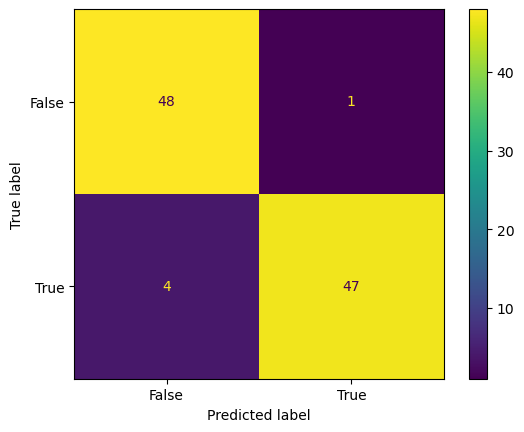

In [58]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
y_pred = model.predict(X_test)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)


cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
#print("Matrice de confusion :")
#print(conf_matrix)

Nous constatons qu'il prédit 4 faux négatifs 47 vrai positifs 1 autre faux négatif et 48 vrai négatifs  

In [59]:
#Evaluation de la performance de notre modèle de classification binaire
mcc = matthews_corrcoef(y_test, y_pred)
print("Coefficient de corrélation de Matthews :", mcc)

Coefficient de corrélation de Matthews : 0.9017018643331521


In [60]:
# Clacul du pourcentage d'échantillons correctement classés par rapport au nombre total d'échantillons
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude :", accuracy)

Exactitude : 0.95


Calculer le rappel des vrai positifs. Cette étape est importante dans le systhème de détections d'AVC car 
un rappel élevé indique que le modèle a une bonne capacité à retrouver les vrais positifs 

In [61]:
from sklearn.metrics import recall_score
# Calculer le rappel
recall = recall_score(y_test, y_pred)
print("Rappel :", recall)

Rappel : 0.9215686274509803


Calculer la précision de notre modèle nous donne la proportion d'échantillons positifs correctement prédits parmis
les échantillons prédits comme positifs par le modèle. Avoir une précision élevée est généralement souhaitable
cependant on ne doit pas l'interpreter sans tenir compte des autres mesures de performance sinon cela faussera l'obtention
d'une image complète de la performance du modèle

In [62]:
from sklearn.metrics import precision_score
# Calculer la précision
precision = precision_score(y_test, y_pred)
print("Précision :", precision)

Précision : 0.9791666666666666


Calculer le F1 score est une mesure de la performance d'un modèle de classification qui combine à la fois la précision et le rappel en une seule métrique. Le score F1 atteint sa meilleur valeur à 1 et sa pire valeur à 0. Un score F1 élevé indique à la fois une bonne précision et un bon rappel

In [63]:
f1 = f1_score(y_test, y_pred)
print("Score F1 :", f1)

Score F1 : 0.9494949494949495


# DEPLOIEMENT

Nous allons utiliser la fonction "pickle.load()" afin de charger notre modèle à partir du fichier spécifié. Une fois chargé, le modèle peut être utilisé pour faire des pédictions ou effectuer d'autres opérations comme s'il avait été fraîchement entrainé.

In [64]:
import pickle 
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

In [65]:
#Création de notre fichier CSV et importation dans notre espace de travail
X.to_csv('healthcare-dataset-stroke-data_processed.csv')

In [66]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,53,0,0,1,0,159.39,29.20000,1,0,0,0,0,0,1,0
1,1,50,0,0,1,1,158.31,32.80000,0,0,1,0,0,1,0,0
2,1,50,0,0,0,1,160.94,26.70000,0,0,1,0,0,0,0,1
3,1,46,0,0,0,1,159.67,37.30000,0,0,1,0,0,0,1,0
4,1,58,0,0,1,1,160.87,28.89456,1,0,0,0,0,1,0,0


In [67]:
#Enregistrement des données de notre DF 'X' dans le fichier CSV sans inclure les index des lignes. 
#Cela le rends plus propre et plus facile a lire.
X.to_csv('healthcare-dataset-stroke-data_processed.csv', index=False)